In [1]:
# Cell 1: Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown as md
import glob
from pathlib import Path
import json

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Cell 2: Load CSV files

display(md("# HPRC Assembly Gene Call Analysis"))
display(md("## Data Loading and Preparation"))
display(md("This notebook analyzes gene calls from HPRC assembly sequences across 7 gene types (IGH, IGK, IGL, TRA, TRB, TRD, TRG) and 95 assemblies."))

# Function to extract sample and gene type from path
def extract_info_from_path(filepath):
    # Extract sample name from the path (parent directory of the gene type)
    path = Path(filepath)
    sample_name = path.parts[-3]
    
    # Extract gene type from the filename or path
    gene_type = path.parts[-2]  # Directory name (IGH, IGK, etc.)
    
    return sample_name, gene_type

# Function to load and process all CSV files
def load_all_csv_files(base_dir):
    all_data = []
    
    # Find all CSV files
    csv_files = glob.glob(f"{base_dir}/**/*.extracted.csv", recursive=True)
    
    display(md(f"### Found {len(csv_files)} CSV files to process"))
    
    for file_path in csv_files:
        try:
            # Extract sample name and gene type from path
            sample_name, gene_type = extract_info_from_path(file_path)
            
            # Read CSV file
            df = pd.read_csv(file_path)
            
            # Add sample name and gene type columns
            df['sample_name'] = sample_name
            df['gene_type'] = gene_type
            
            # Add to the list of dataframes
            all_data.append(df)
            
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Combine all dataframes
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

# Load all data
base_dir = "../digger-results"  # Adjust path as needed
all_gene_data = load_all_csv_files(base_dir)
all_gene_data = all_gene_data.dropna(subset=['imgt_match'])

# Print the columns to debug what's available
print("Available columns in the dataset:")
print(list(all_gene_data.columns))

# First create a copy of the functional field - if it exists
# if 'functional' in all_gene_data.columns:
#     print("'functional' column found - renaming to 'digger_functional'")
#     all_gene_data['digger_functional'] = all_gene_data['functional']
# else:
#     print("No 'functional' column found in the dataset")

# Load the JSON containing the functional status information
with open("./allele_functional_status.json", 'r') as f:
    allele_status = json.load(f)

# Create a mapping dictionary from truncated gene type to full gene type with V
gene_type_mapping = {
    'IGH': 'IGHV',
    'IGK': 'IGKV',
    'IGL': 'IGLV',
    'TRA': 'TRAV',
    'TRB': 'TRBV',
    'TRD': 'TRDV',
    'TRG': 'TRGV'
}
functional_label_mappings = {
    "F": "Functional",
    "P": "pseudo",
    "ORF": "ORF"}

# Function to get functional status from JSON
def get_functional_status(row):
    # Map the gene type to include V
    full_gene_type = gene_type_mapping.get(row['gene_type'])
    allele_id = row['imgt_match']
    
    # If we have both the gene type and allele ID, look up the status
    status = functional_label_mappings[allele_status[full_gene_type].get(allele_id, None)]
    return status

# Apply the function to create the new 'functional' column
all_gene_data['functional_imgt'] = all_gene_data.apply(get_functional_status, axis=1)
    

# Display basic information about the loaded data
display(md("## Data Loading Complete"))
display(md(f"### Loaded data from {all_gene_data['sample_name'].nunique()} assemblies and {all_gene_data['gene_type'].nunique()} gene types"))
display(md("### First few rows of the combined dataset:"))
display(all_gene_data.head())

# Check the counts of samples and gene types
display(md("### Number of rows per gene type:"))
display(all_gene_data['gene_type'].value_counts())
display(md("### Number of unique samples per gene type:"))
display(all_gene_data.groupby('gene_type')['sample_name'].nunique())

# Show counts of functional status values
display(md("### Distribution of allele functional status:"))
display(all_gene_data['functional'].value_counts(dropna=False))

# HPRC Assembly Gene Call Analysis

## Data Loading and Preparation

This notebook analyzes gene calls from HPRC assembly sequences across 7 gene types (IGH, IGK, IGL, TRA, TRB, TRD, TRG) and 95 assemblies.

### Found 658 CSV files to process

Available columns in the dataset:
['contig', 'start', 'end', 'start_rev', 'end_rev', 'sense', 'gene_type', 'gene_start', 'gene_end', 'gene_start_rev', 'gene_end_rev', 'imgt_match', 'imgt_score', 'imgt_nt_diffs', 'functional', 'notes', 'likelihood', 'tata_box', 'octamer', 'l_part1', 'l_part2', 'v_heptamer', 'v_nonamer', 'j_heptamer', 'j_nonamer', 'j_frame', 'd_3_heptamer', 'd_3_nonamer', 'd_5_heptamer', 'd_5_nonamer', 'aa', 'v-gene_aligned_aa', 'gene_seq', 'seq', 'seq_gapped', '5_rss_start', '5_rss_start_rev', '5_rss_end', '5_rss_end_rev', '3_rss_start', '3_rss_start_rev', '3_rss_end', '3_rss_end_rev', 'l_part1_start', 'l_part1_start_rev', 'l_part1_end', 'l_part1_end_rev', 'l_part2_start', 'l_part2_start_rev', 'l_part2_end', 'l_part2_end_rev', 'octamer_start', 'octamer_start_rev', 'octamer_end', 'octamer_end_rev', 'tata_box_start', 'tata_box_start_rev', 'tata_box_end', 'tata_box_end_rev', 'matches', 'blast_match', 'blast_score', 'blast_nt_diffs', 'evalue', 'sample_name']


## Data Loading Complete

### Loaded data from 94 assemblies and 7 gene types

### First few rows of the combined dataset:

contig   start     end  start_rev  \
0  hg0022jahksd010000001186265773-86267608    1124    1410        427   
1  hg0022jahksd010000044186185291-86491578   73728   74029     232260   
2  hg0022jahksd010000044186185291-86491578  273207  273511      32778   
3  hg0022jahksd010000044186185291-86491578  278666  278966      27323   
4      hg0022jahksd010000060111859-1805818      20     289     903294   

   end_rev sense gene_type  gene_start  gene_end  gene_start_rev  ...  \
0      713     -       IGH        1086      1547             290  ...   
1   232561     -       IGH       73690     74219          232070  ...   
2    33082     -       IGH      273168    273763           32526  ...   
3    27623     -       IGH      278627    279129           27160  ...   
4   903563     +       IGH           1       327          903256  ...   

   tata_box_start_rev tata_box_end  tata_box_end_rev  matches  \
0               334.0       1503.0             341.0        1   
1                 NaN          NaN               NaN       22   
2             32553.0     273736.0           32562.0      286   
3             27185.0     279104.0           27195.0       11   
4                 NaN          NaN               NaN        4   

         blast_match blast_score  blast_nt_diffs         evalue  \
0      IGHV1-69-2*01       42.16             218   6.500000e+00   
1        IGHV3-33*08       41.06             202   4.400000e+00   
2         IGHV6-1*01      100.00               0  4.600000e-136   
3         IGHV6-1*01       47.84             183   4.200000e-10   
4  IGHV(III)-76-1*01       67.04             160   1.610000e-22   

                             sample_name functional_imgt  
0  HG002.maternal.f1_assembly_v2_genbank          pseudo  
1  HG002.maternal.f1_assembly_v2_genbank             ORF  
2  HG002.maternal.f1_assembly_v2_genbank      Functional  
3  HG002.maternal.f1_assembly_v2_genbank          pseudo  
4  HG002.maternal.f1_assembly_v2_genbank          pseudo  

[5 rows x 66 columns]

### Number of rows per gene type:

gene_type
IGH    14187
IGL    10845
TRA     7892
TRB     7638
IGK     7555
TRG     1533
TRD      188
Name: count, dtype: int64

### Number of unique samples per gene type:

gene_type
IGH    94
IGK    94
IGL    94
TRA    94
TRB    94
TRD    94
TRG    94
Name: sample_name, dtype: int64

### Distribution of allele functional status:

functional
pseudo        22472
Functional    19475
ORF            7891
Name: count, dtype: int64

## Distribution of Contigs per Sample by Gene Type

This analysis shows the distribution of the number of contigs identified per sample, grouped by gene type.

### Summary Statistics: Number of Contigs per Sample by Gene Type

count      mean       std  min  25%  50%  75%  max
gene_type                                                    
IGH         94.0  3.563830  2.071613  1.0  2.0  3.0  5.0  9.0
IGK         94.0  3.021277  1.488152  1.0  2.0  3.0  4.0  7.0
IGL         94.0  1.255319  0.686837  1.0  1.0  1.0  1.0  4.0
TRA         94.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
TRB         94.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
TRD         94.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
TRG         94.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

### Distribution Plot: Number of Contigs per Sample Across All Gene Types

/tmp/ipykernel_3443718/479469971.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['contig_count'], label=gene)
/tmp/ipykernel_3443718/479469971.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['contig_count'], label=gene)
/tmp/ipykernel_3443718/479469971.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['contig_count'], label=gene)
/tmp/ipykernel_3443718/479469971.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['contig_count'], label=gene)


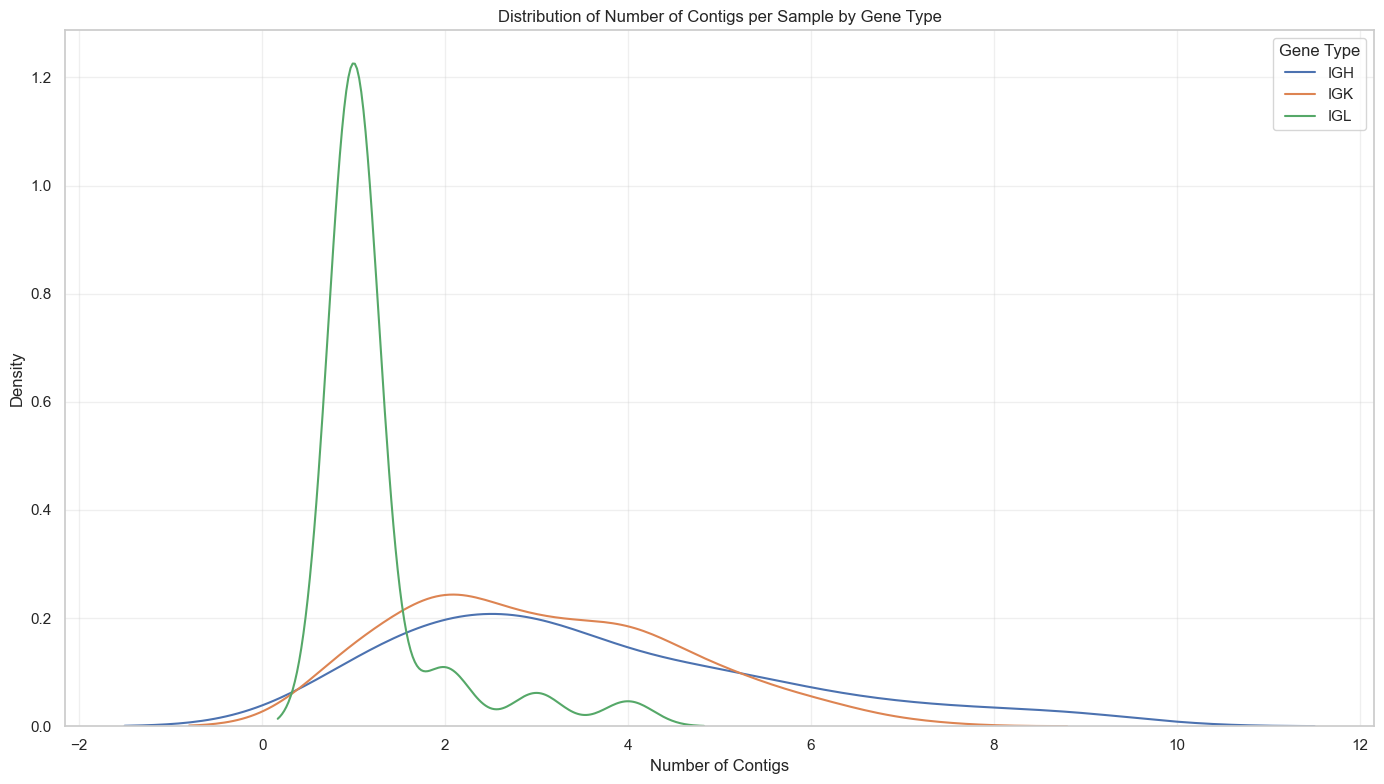

### Individual Distribution Plots: Number of Contigs per Sample for Each Gene Type

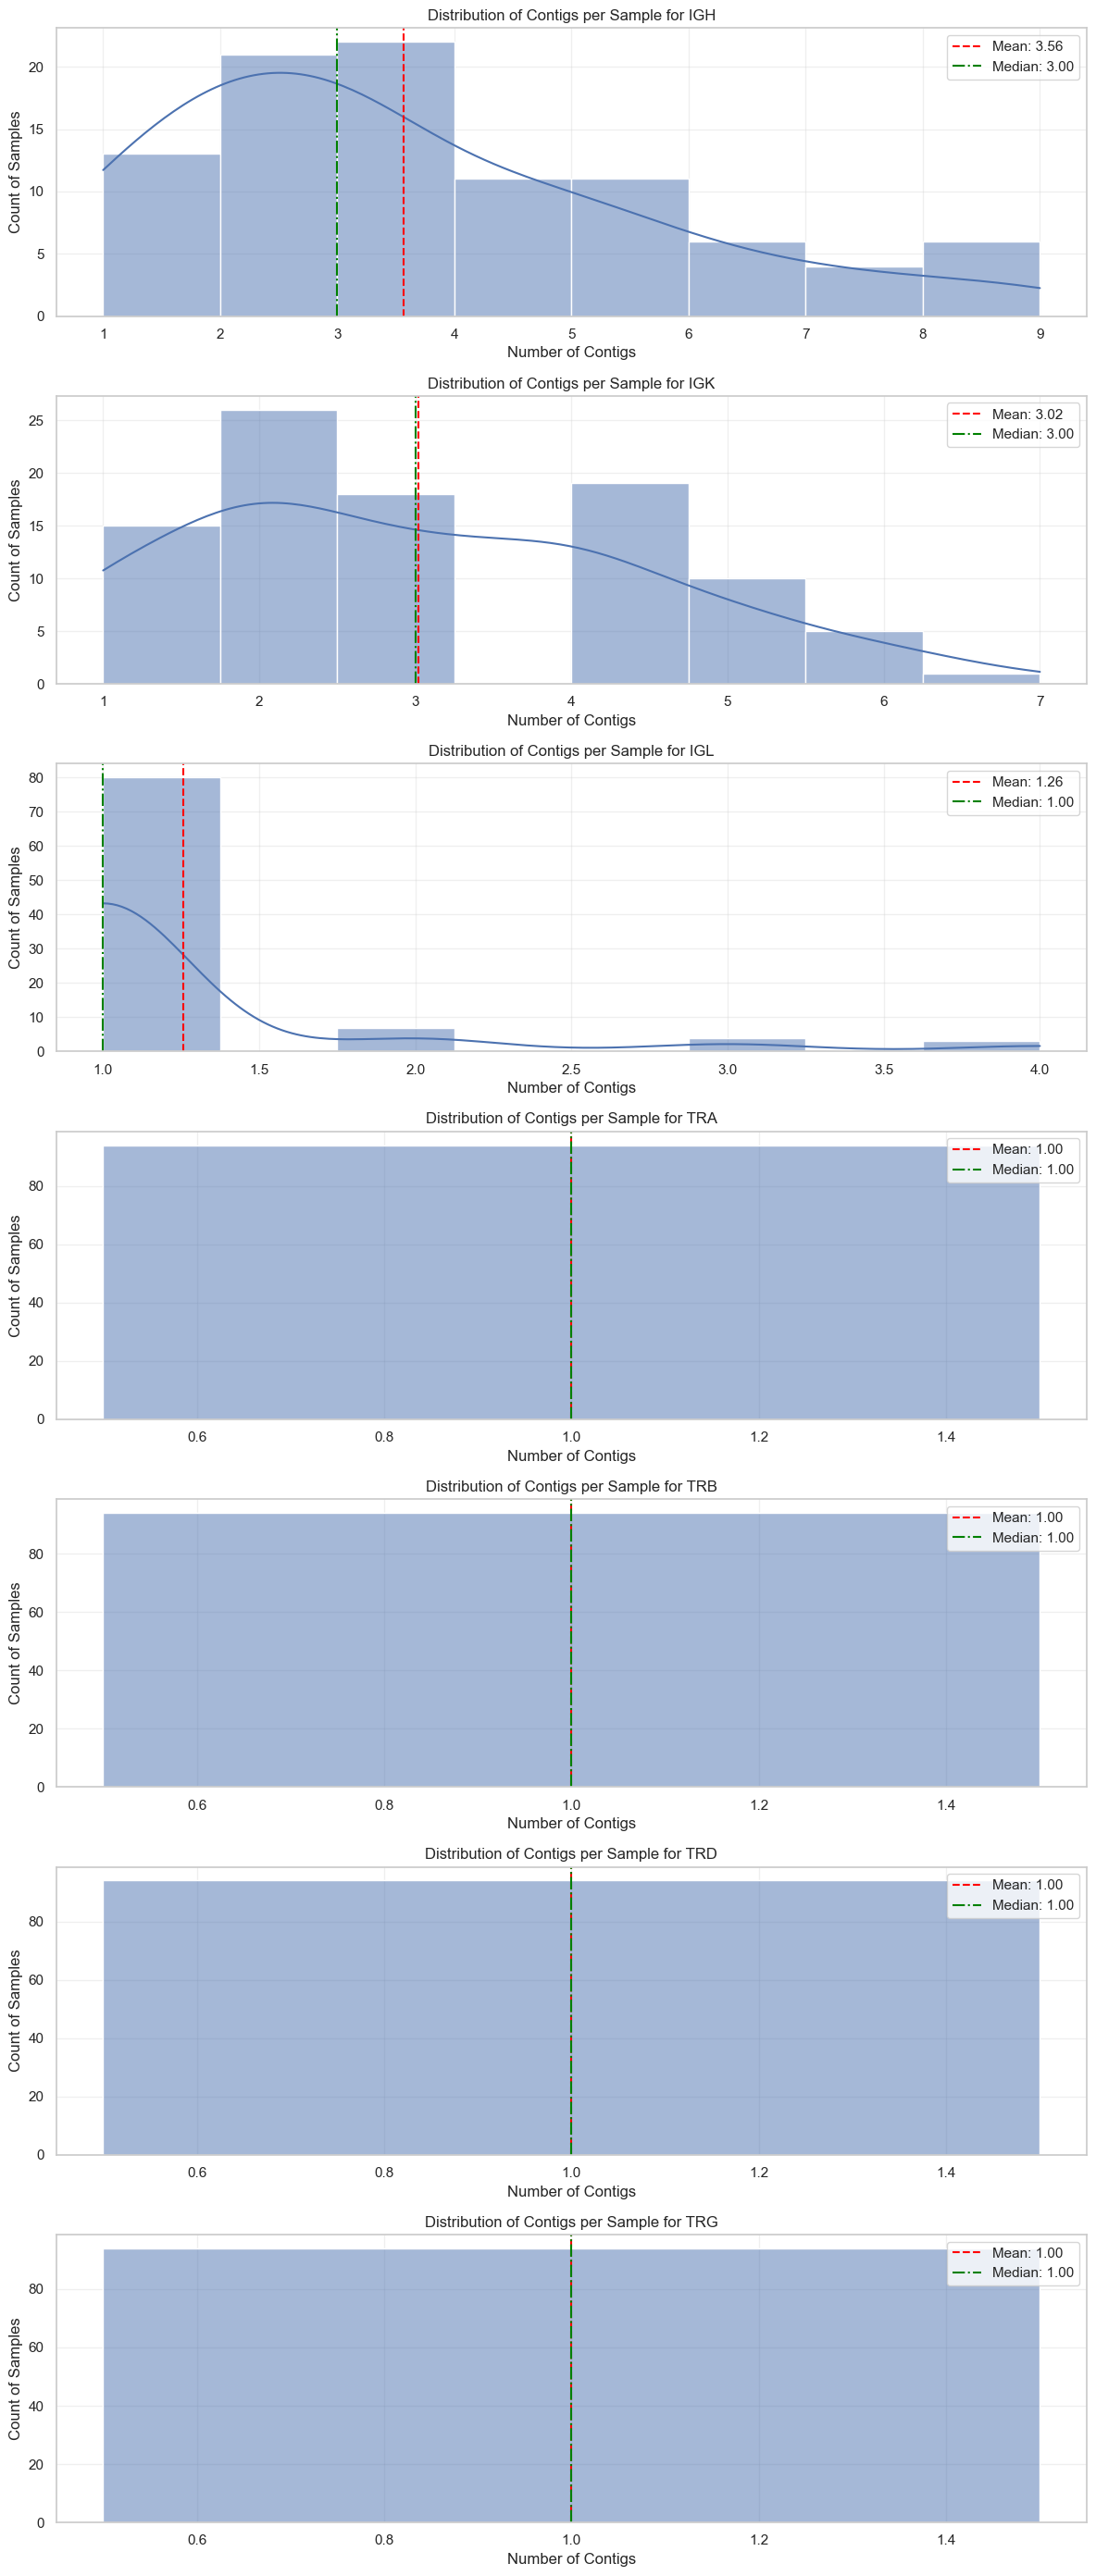

### Box Plot: Number of Contigs per Sample by Gene Type

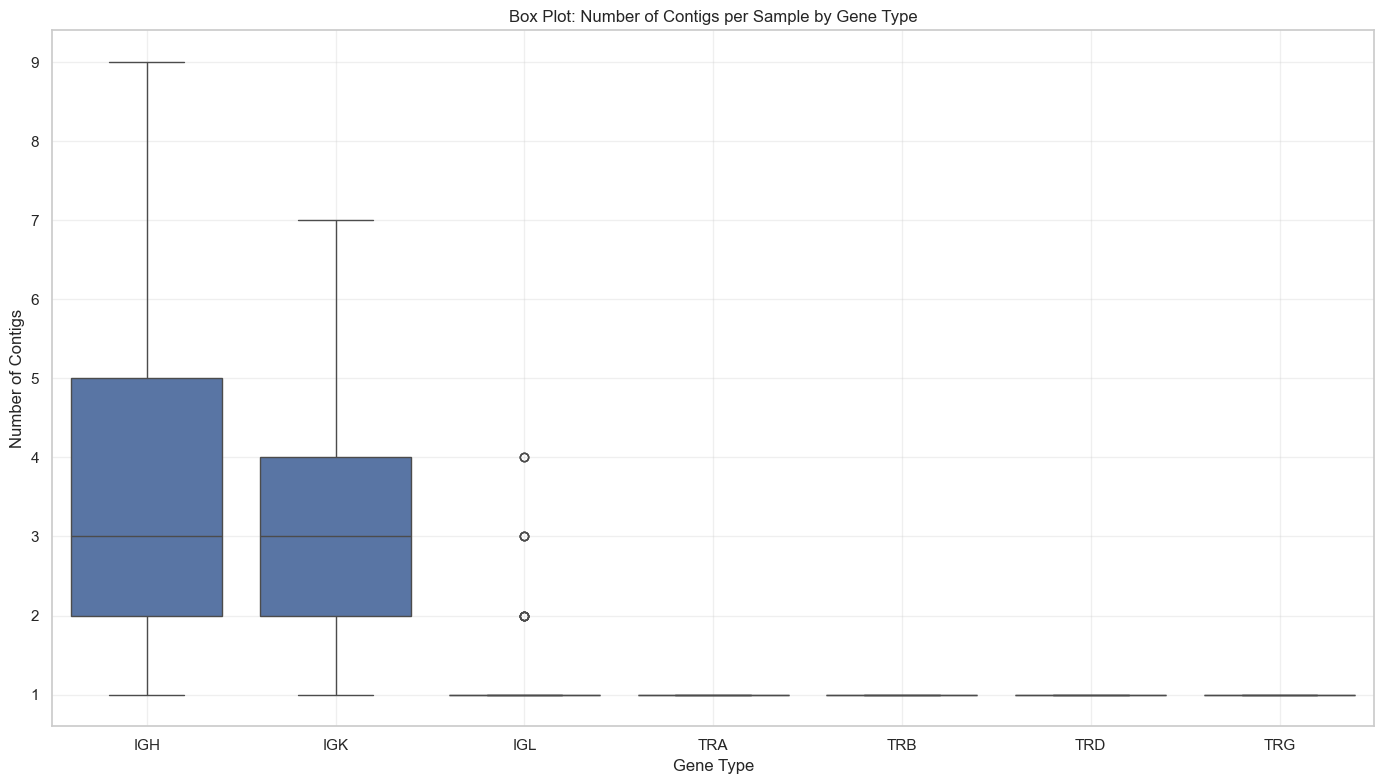

In [3]:

# Cell 3: Distribution of contigs per sample by gene type
display(md("## Distribution of Contigs per Sample by Gene Type"))
display(md("This analysis shows the distribution of the number of contigs identified per sample, grouped by gene type."))

# Count unique contigs per sample for each gene type
contigs_per_sample = all_gene_data.groupby(['sample_name', 'gene_type'])['contig'].nunique().reset_index()
contigs_per_sample.columns = ['sample_name', 'gene_type', 'contig_count']

# Summary statistics
display(md("### Summary Statistics: Number of Contigs per Sample by Gene Type"))
summary_by_gene = contigs_per_sample.groupby('gene_type')['contig_count'].describe()
display(summary_by_gene)

# Distribution plot for all gene types
display(md("### Distribution Plot: Number of Contigs per Sample Across All Gene Types"))
plt.figure(figsize=(14, 8))
for gene in contigs_per_sample['gene_type'].unique():
    subset = contigs_per_sample[contigs_per_sample['gene_type'] == gene]
    sns.kdeplot(subset['contig_count'], label=gene)

plt.title('Distribution of Number of Contigs per Sample by Gene Type')
plt.xlabel('Number of Contigs')
plt.ylabel('Density')
plt.legend(title='Gene Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Individual distribution plots for each gene type
display(md("### Individual Distribution Plots: Number of Contigs per Sample for Each Gene Type"))
fig, axes = plt.subplots(nrows=len(contigs_per_sample['gene_type'].unique()), figsize=(12, 4*len(contigs_per_sample['gene_type'].unique())))
gene_types = sorted(contigs_per_sample['gene_type'].unique())

for i, gene in enumerate(gene_types):
    subset = contigs_per_sample[contigs_per_sample['gene_type'] == gene]
    sns.histplot(subset['contig_count'], kde=True, ax=axes[i])
    
    # Add mean and median lines
    mean_val = subset['contig_count'].mean()
    median_val = subset['contig_count'].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of Contigs per Sample for {gene}')
    axes[i].set_xlabel('Number of Contigs')
    axes[i].set_ylabel('Count of Samples')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plot comparison
display(md("### Box Plot: Number of Contigs per Sample by Gene Type"))
plt.figure(figsize=(14, 8))
sns.boxplot(x='gene_type', y='contig_count', data=contigs_per_sample)
plt.title('Box Plot: Number of Contigs per Sample by Gene Type')
plt.xlabel('Gene Type')
plt.ylabel('Number of Contigs')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Distribution of Genes Identified per Assembly and Gene Type

This analysis shows how many genes are identified in each assembly for each gene type.

### Summary Statistics of Gene Counts

count        mean        std    min    25%    50%    75%    max
gene_type                                                                 
IGH         94.0  150.925532  21.670176  102.0  139.0  146.5  159.0  231.0
IGK         94.0   80.372340  22.791238   42.0   56.0   81.0  103.0  140.0
IGL         94.0  115.372340  10.077105   55.0  116.0  116.5  118.0  129.0
TRA         94.0   83.957447   1.530443   80.0   84.0   84.0   85.0   86.0
TRB         94.0   81.255319   2.194500   75.0   80.0   81.0   83.0   87.0
TRD         94.0    2.000000   0.000000    2.0    2.0    2.0    2.0    2.0
TRG         94.0   16.308511   1.227171   14.0   15.0   17.0   17.0   18.0

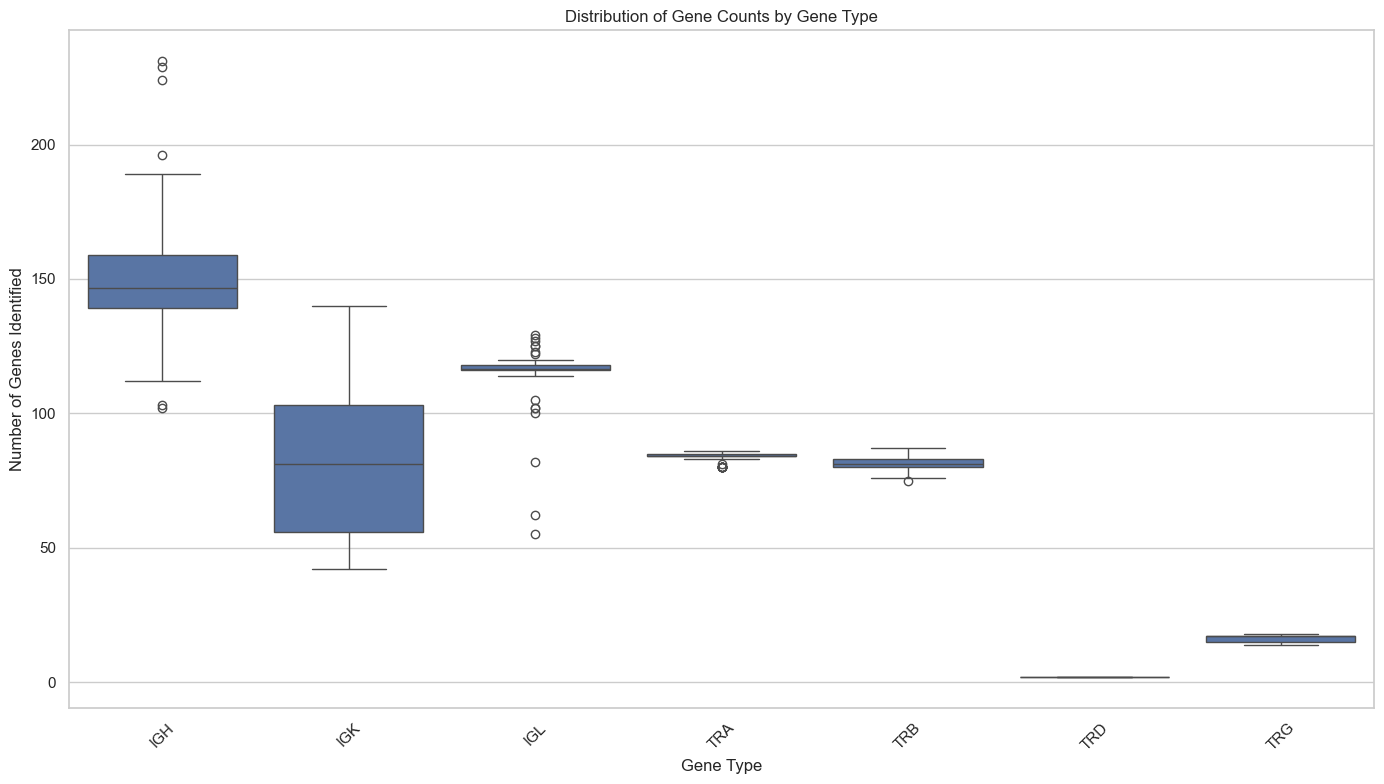

### Heatmap: Gene Counts Across Assemblies and Gene Types

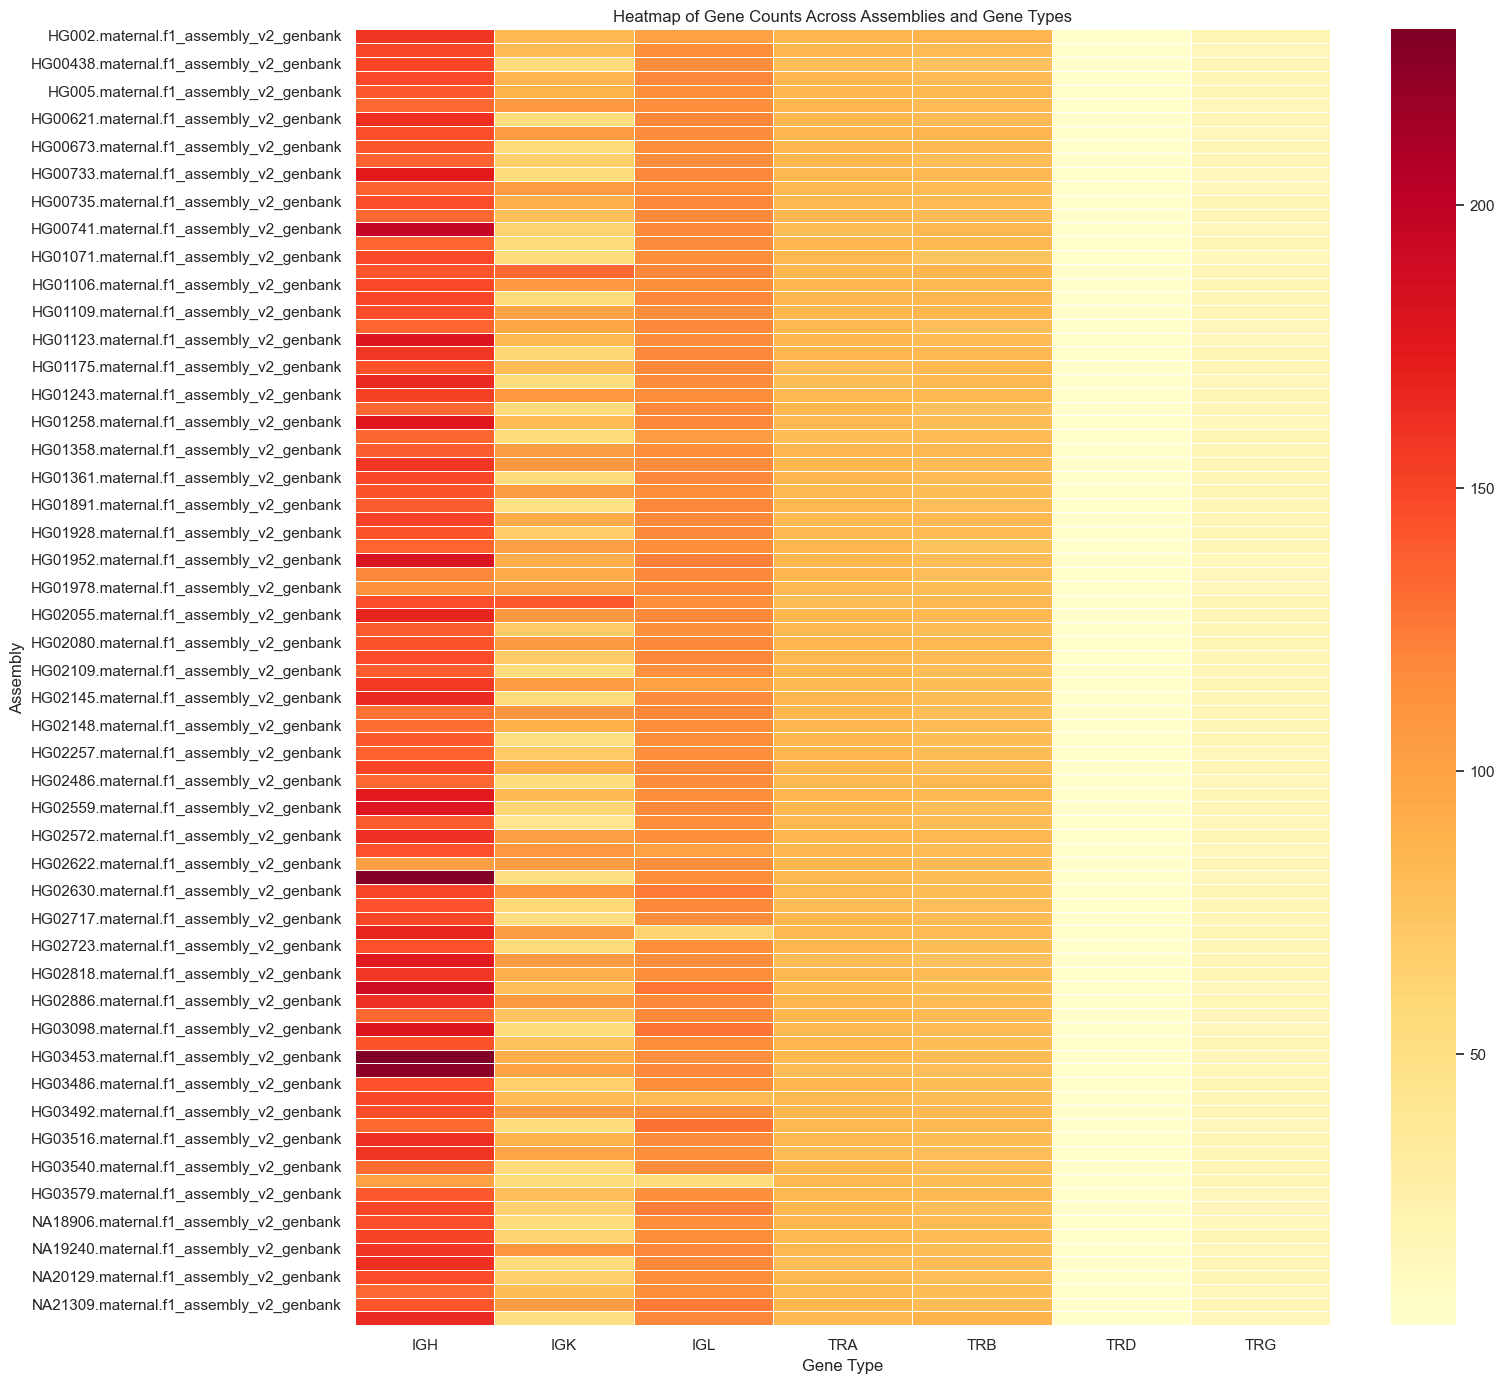

In [4]:
# Cell 4: Analyze distribution of genes identified per assembly/gene type
display(md("## Distribution of Genes Identified per Assembly and Gene Type"))
display(md("This analysis shows how many genes are identified in each assembly for each gene type."))

# Count genes per sample and gene type
# Assuming each row in the CSV represents one gene identification
gene_counts = all_gene_data.groupby(['sample_name', 'gene_type']).size().reset_index(name='gene_count')

# Display summary statistics
display(md("### Summary Statistics of Gene Counts"))
gene_summary_stats = gene_counts.groupby('gene_type')['gene_count'].describe()
display(gene_summary_stats)

# Create a box plot of gene counts by gene type
plt.figure(figsize=(14, 8))
sns.boxplot(x='gene_type', y='gene_count', data=gene_counts)
plt.title('Distribution of Gene Counts by Gene Type')
plt.xlabel('Gene Type')
plt.ylabel('Number of Genes Identified')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap to visualize gene counts across assemblies and gene types
display(md("### Heatmap: Gene Counts Across Assemblies and Gene Types"))
# Pivot the data for the heatmap
pivot_gene = gene_counts.pivot(index='sample_name', columns='gene_type', values='gene_count')

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(pivot_gene, annot=False, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Gene Counts Across Assemblies and Gene Types')
plt.xlabel('Gene Type')
plt.ylabel('Assembly')
plt.tight_layout()
plt.show()

## Analysis of Functional Status of Genes

This analysis examines the functional status of identified genes across different gene types.

### Bar Plot: Mean Functional Status per Sample by Gene Type

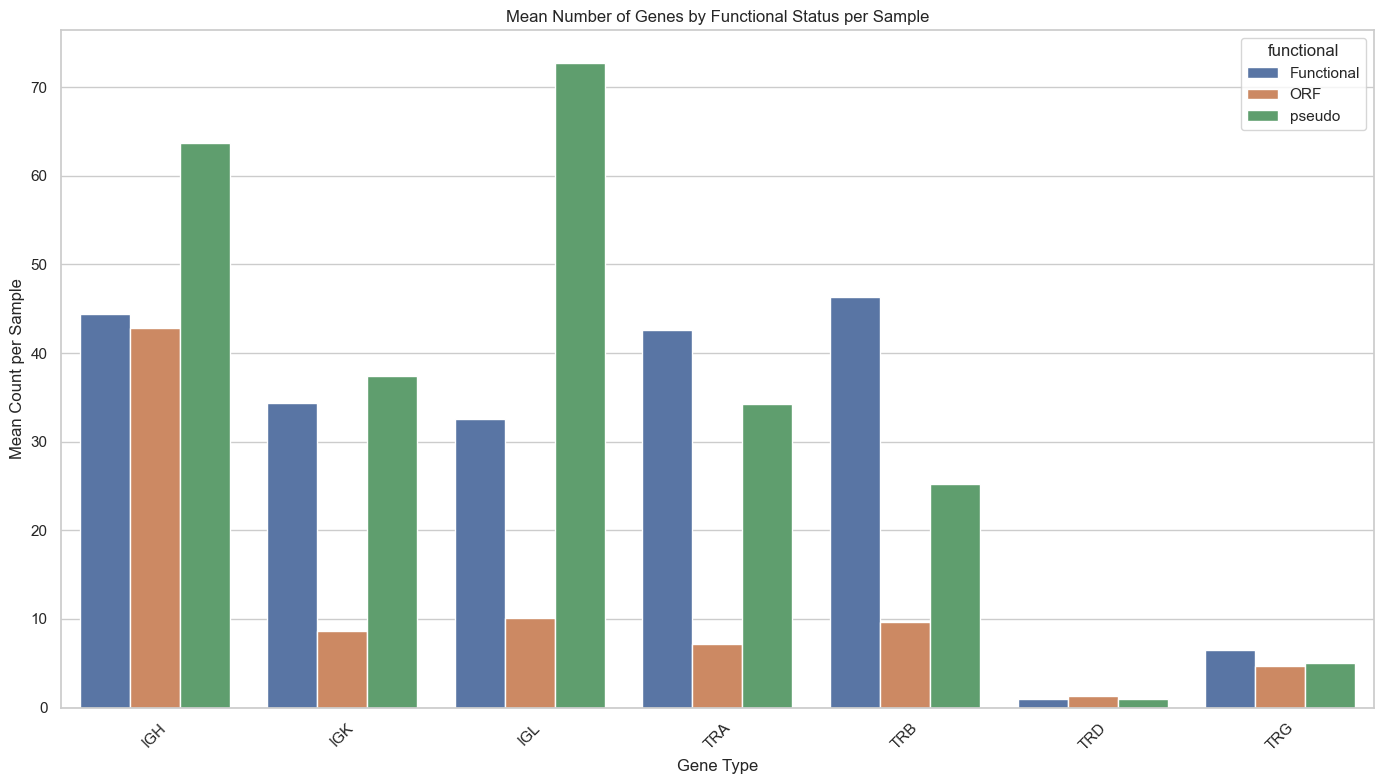

### Percentage of Functional Status by Gene Type

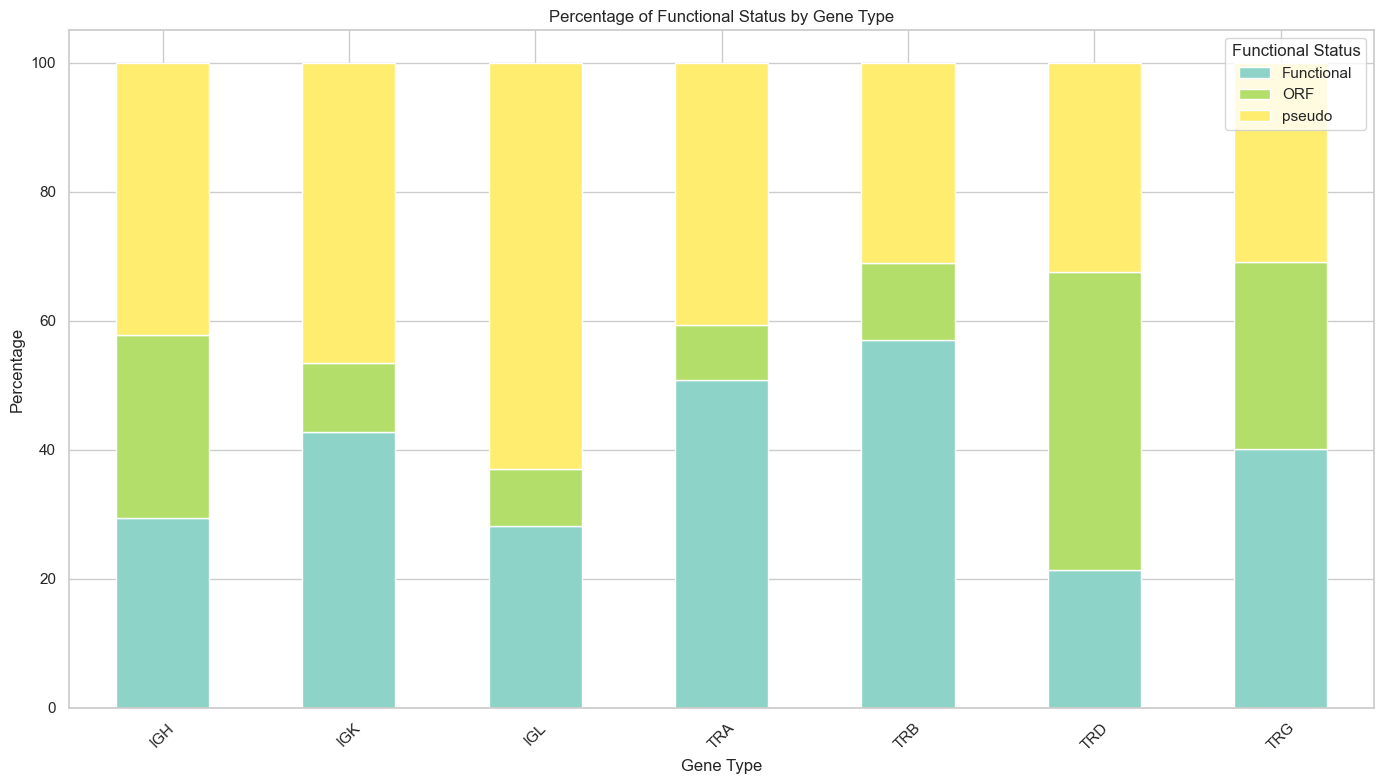

## Correlation Analysis of Numerical Features

This analysis examines relationships between different numerical features in the dataset.

### Correlation Matrix of Numerical Features

imgt_score  imgt_nt_diffs  blast_score  blast_nt_diffs  \
imgt_score        1.000000      -0.995268     0.696059       -0.510233   
imgt_nt_diffs    -0.995268       1.000000    -0.690506        0.509893   
blast_score       0.696059      -0.690506     1.000000       -0.865370   
blast_nt_diffs   -0.510233       0.509893    -0.865370        1.000000   
evalue           -0.411480       0.403629    -0.401096        0.287261   

                  evalue  
imgt_score     -0.411480  
imgt_nt_diffs   0.403629  
blast_score    -0.401096  
blast_nt_diffs  0.287261  
evalue          1.000000

### Heatmap: Correlation Between Numerical Features

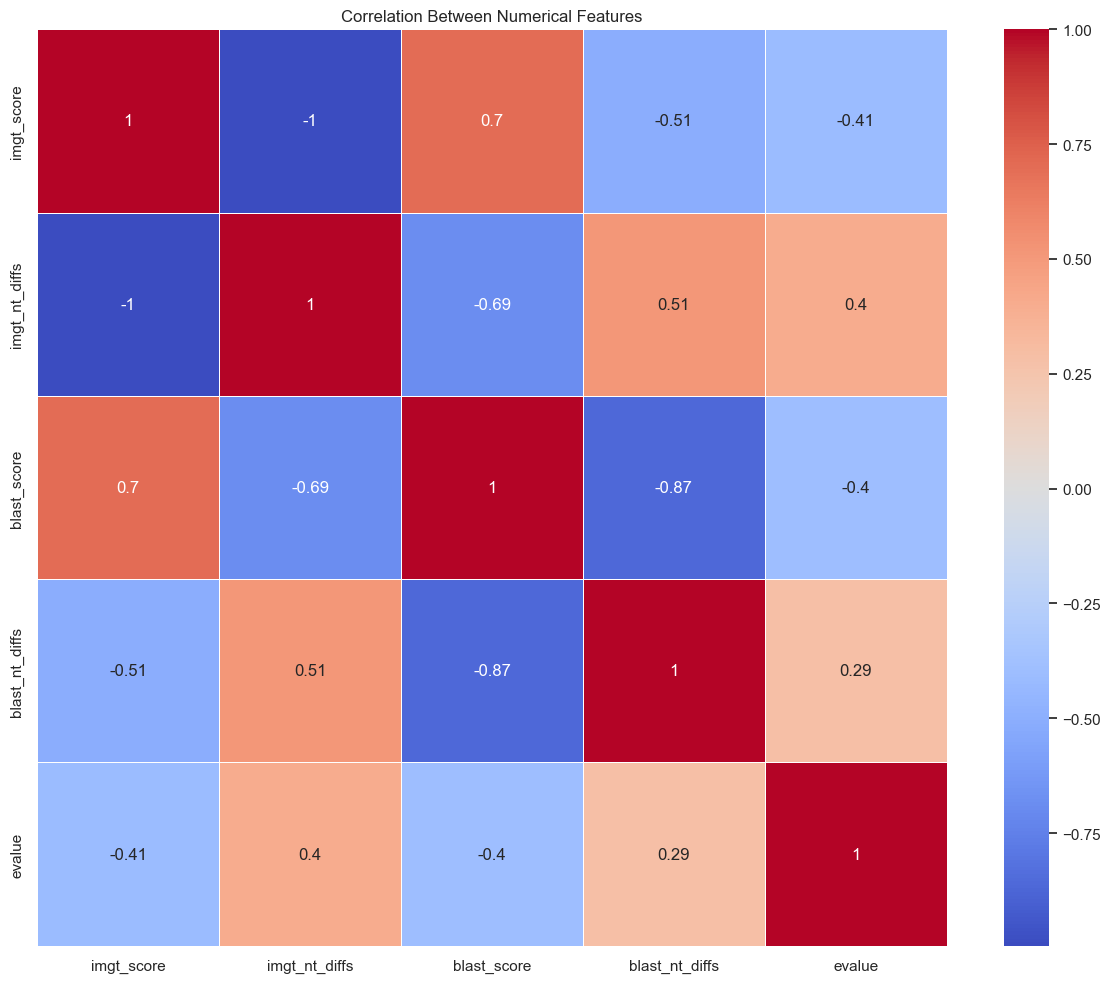

### Pairplot of Key Numerical Features

<Figure size 1600x1400 with 0 Axes>

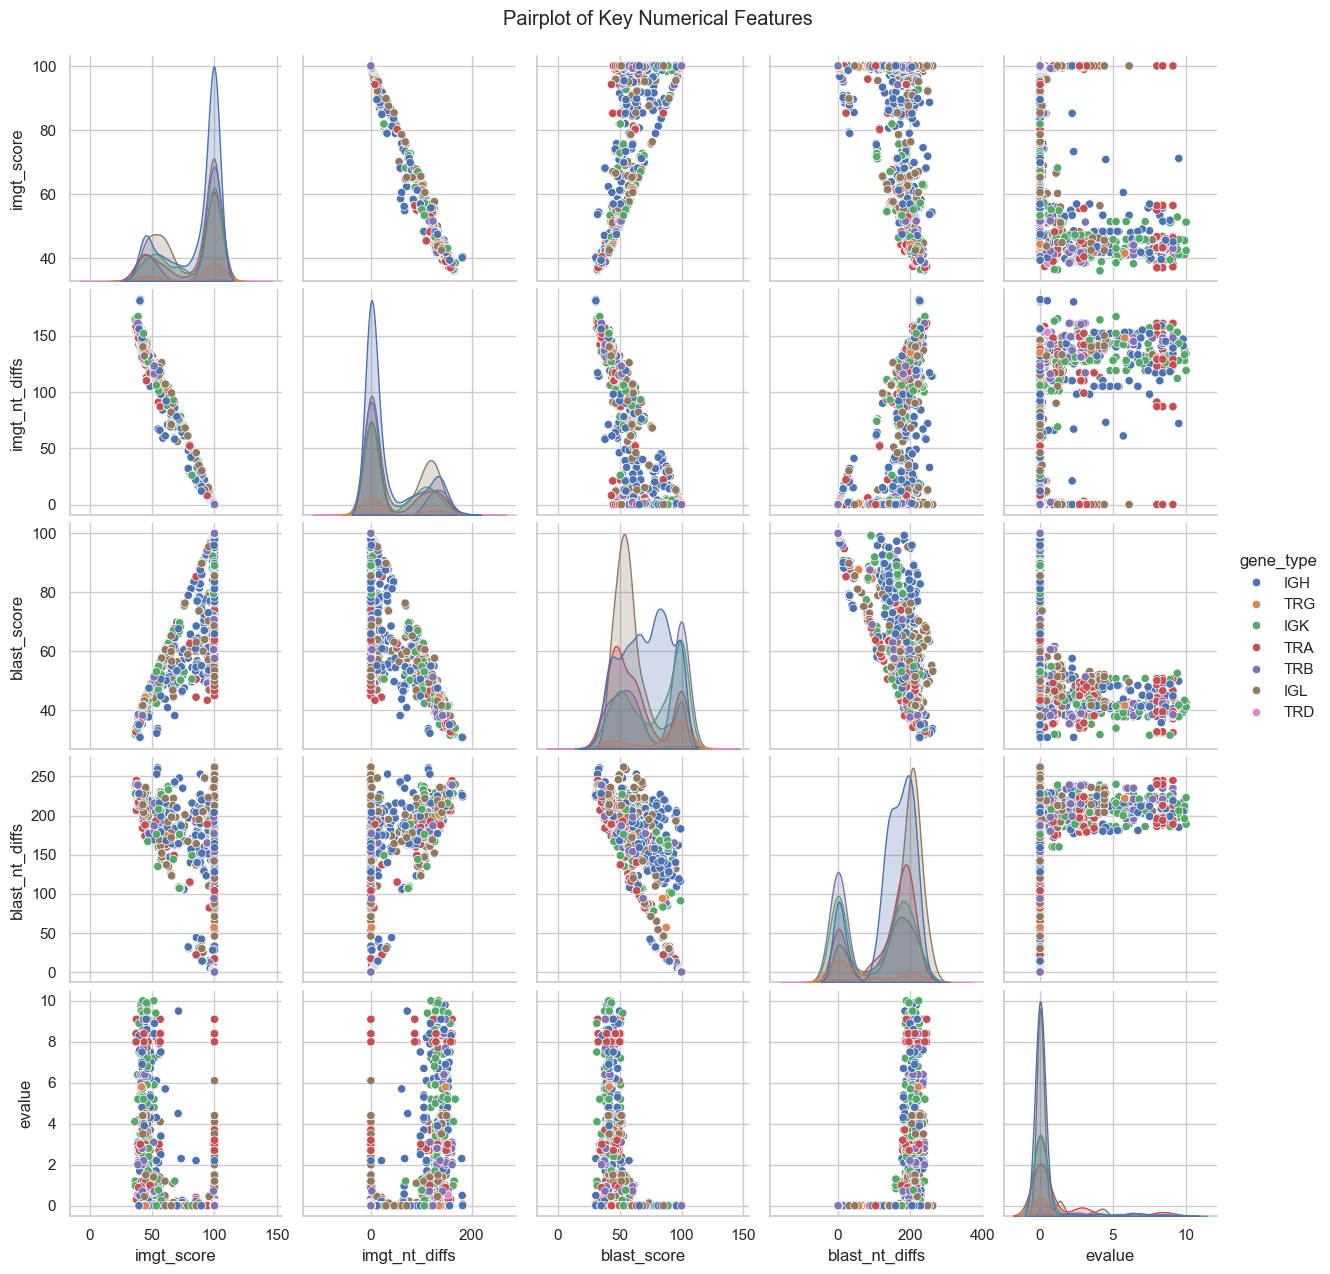

In [5]:

# Cell 6: Analyze functional status of genes (if available)
display(md("## Analysis of Functional Status of Genes"))
display(md("This analysis examines the functional status of identified genes across different gene types."))

# Check if functional column exists
if 'functional' in all_gene_data.columns:
    # Count functional status per gene type
    functional_counts = all_gene_data.groupby(['gene_type', 'functional']).size().reset_index(name='count')
    
    # Calculate mean functional status per sample for each gene type
    functional_by_sample = all_gene_data.groupby(['sample_name', 'gene_type', 'functional']).size().reset_index(name='count')
    functional_means = functional_by_sample.groupby(['gene_type', 'functional'])['count'].mean().reset_index(name='mean_count')
    
    # Create a bar plot of mean functional status by gene type
    display(md("### Bar Plot: Mean Functional Status per Sample by Gene Type"))
    plt.figure(figsize=(14, 8))
    g = sns.barplot(x='gene_type', hue='functional', y='mean_count', data=functional_means)
    plt.title('Mean Number of Genes by Functional Status per Sample')
    plt.xlabel('Gene Type')
    plt.ylabel('Mean Count per Sample')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentage of functional genes by gene type
    functional_percent = all_gene_data.groupby('gene_type')['functional'].value_counts(normalize=True).mul(100).reset_index()
    functional_percent.columns = ['gene_type', 'functional', 'percentage']
    
    # Plot percentage stacked bar chart
    display(md("### Percentage of Functional Status by Gene Type"))
    functional_pivot = functional_percent.pivot(index='gene_type', columns='functional', values='percentage')
    functional_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
    plt.title('Percentage of Functional Status by Gene Type')
    plt.xlabel('Gene Type')
    plt.ylabel('Percentage')
    plt.legend(title='Functional Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    display(md("### Functional status column not found in the data"))

# Cell 7: Correlation analysis of numerical features
display(md("## Correlation Analysis of Numerical Features"))
display(md("This analysis examines relationships between different numerical features in the dataset."))

# List of potential numerical columns to analyze
numerical_columns = ['imgt_score', 'imgt_nt_diffs', 'blast_score', 'blast_nt_diffs', 'evalue']
numerical_columns = [col for col in numerical_columns if col in all_gene_data.columns]

if numerical_columns:
    # Compute correlation matrix
    correlation_matrix = all_gene_data[numerical_columns].corr()
    
    # Display correlation matrix
    display(md("### Correlation Matrix of Numerical Features"))
    display(correlation_matrix)
    
    # Create a heatmap of the correlation matrix
    display(md("### Heatmap: Correlation Between Numerical Features"))
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Between Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Create pairplot for key features
    display(md("### Pairplot of Key Numerical Features"))
    plt.figure(figsize=(16, 14))
    sample_data = all_gene_data.sample(min(5000, len(all_gene_data)))  # Sample to avoid overcrowding
    sns.pairplot(sample_data, vars=numerical_columns, hue='gene_type', diag_kind='kde')
    plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
    plt.show()
else:
    display(md("### No numerical columns found for correlation analysis"))


## Distribution of Genes per Contig by Gene Type and Functional Status

This analysis examines how many genes of each functional status (functional, pseudogene, ORF) are found on each contig, grouped by gene type.

### Distribution of Genes per Contig for IGH

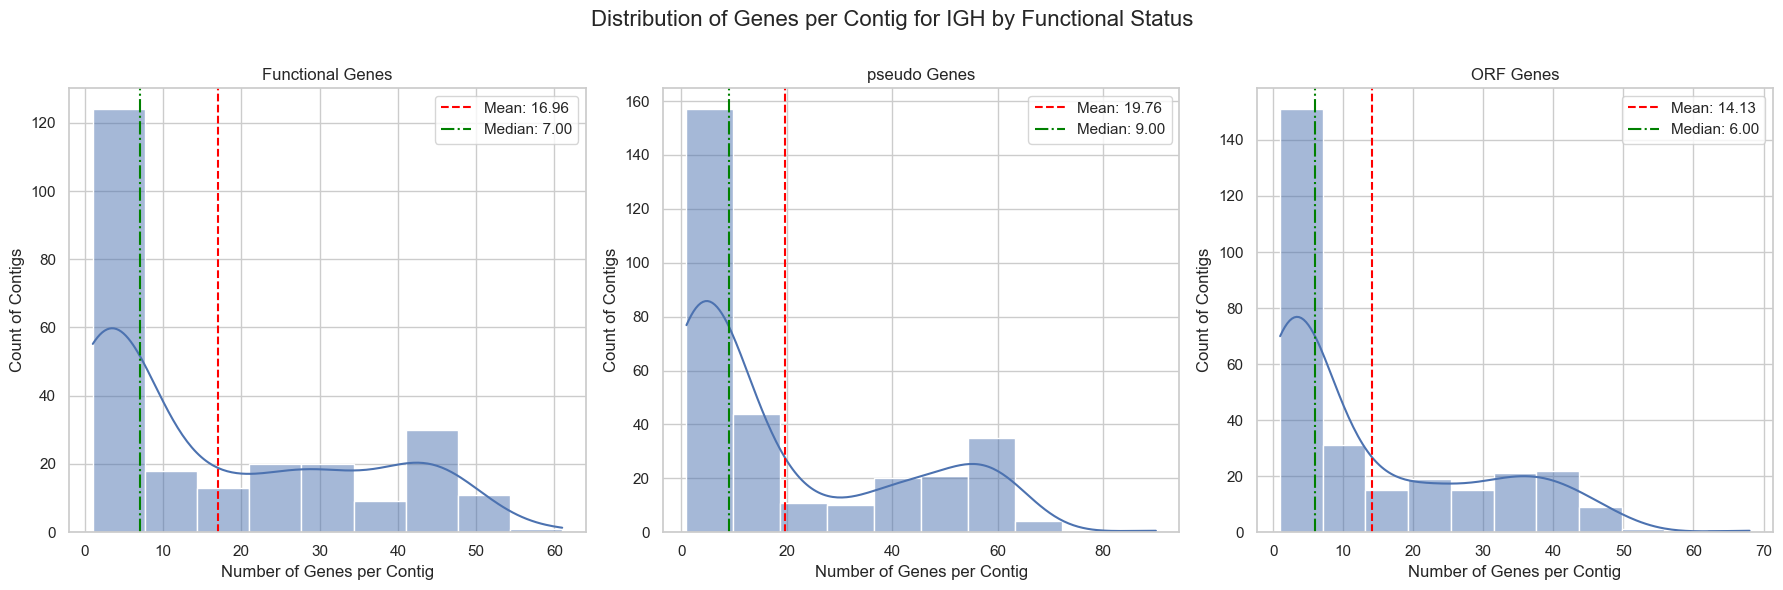

### Distribution of Genes per Contig for IGK

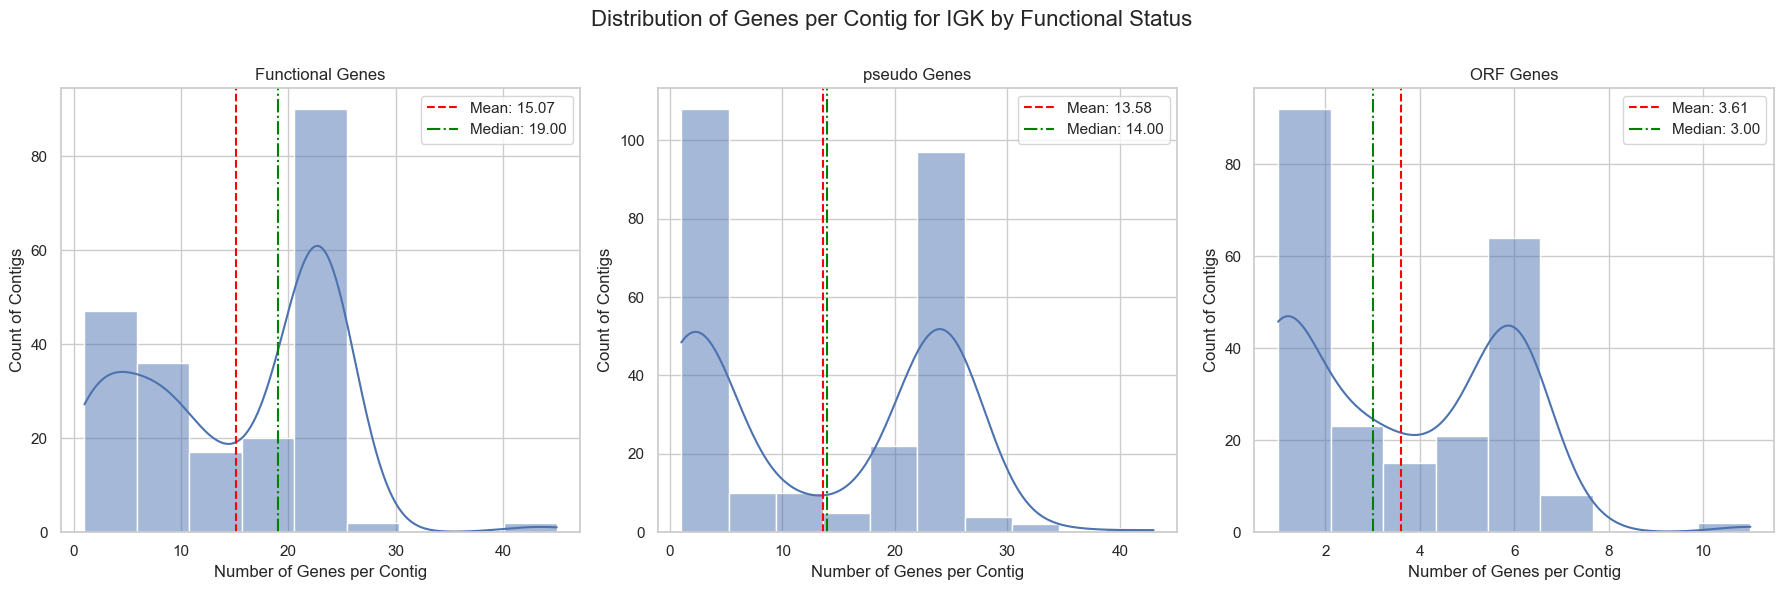

### Distribution of Genes per Contig for IGL

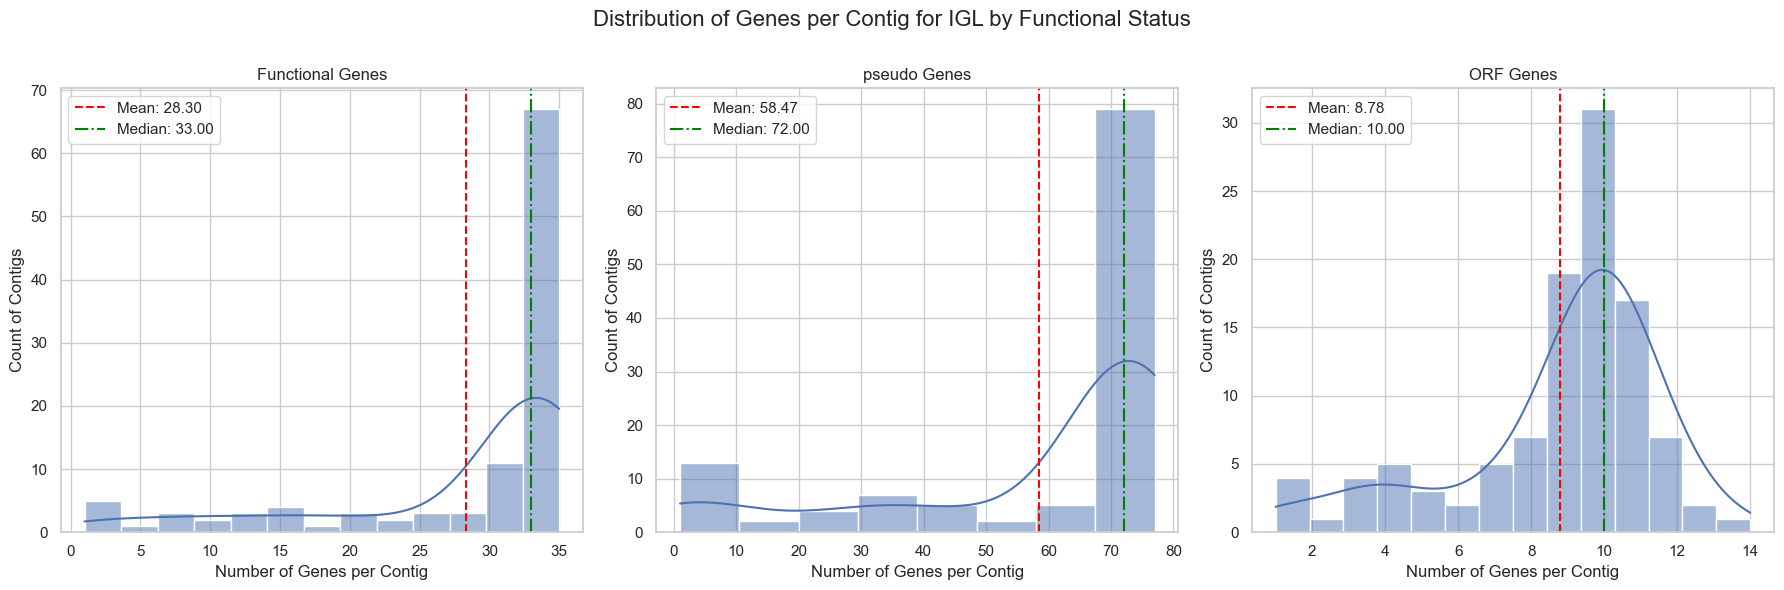

### Distribution of Genes per Contig for TRA

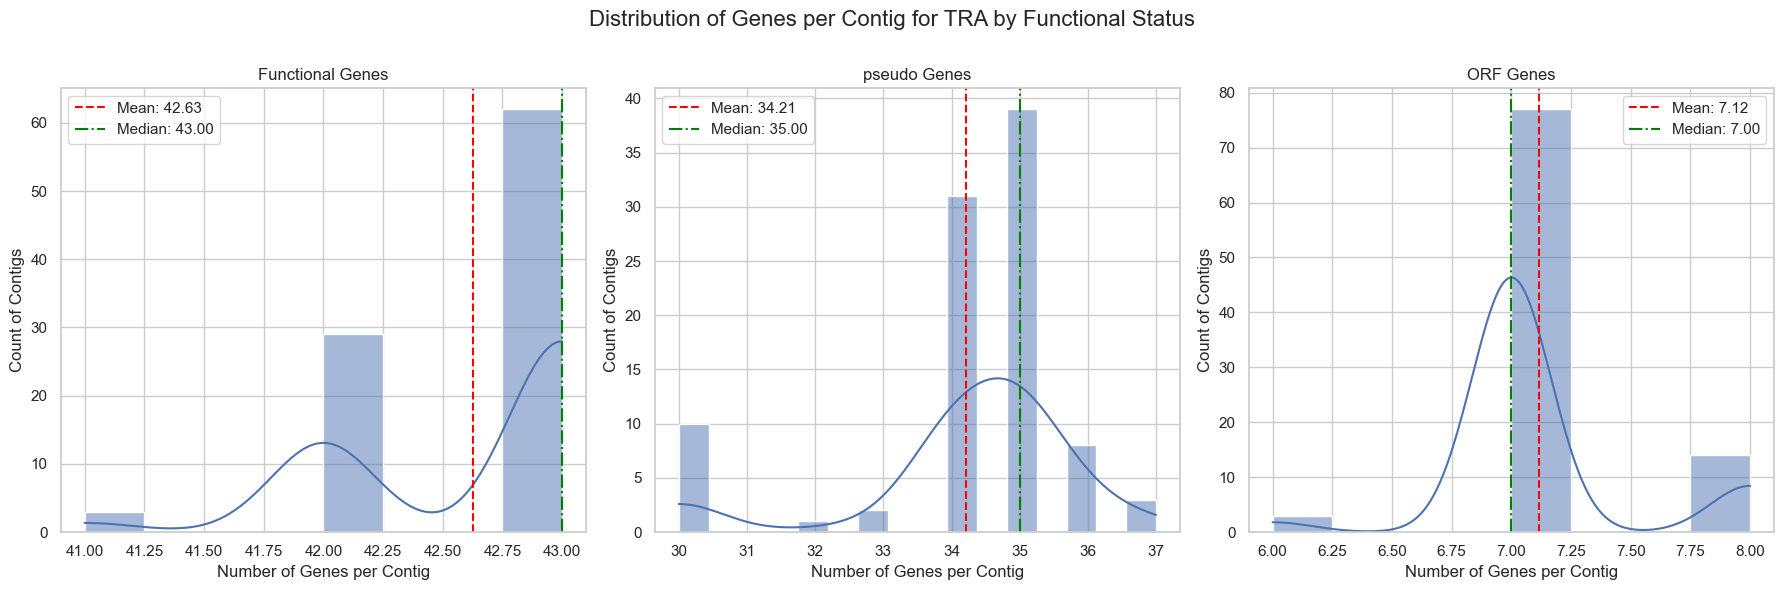

### Distribution of Genes per Contig for TRB

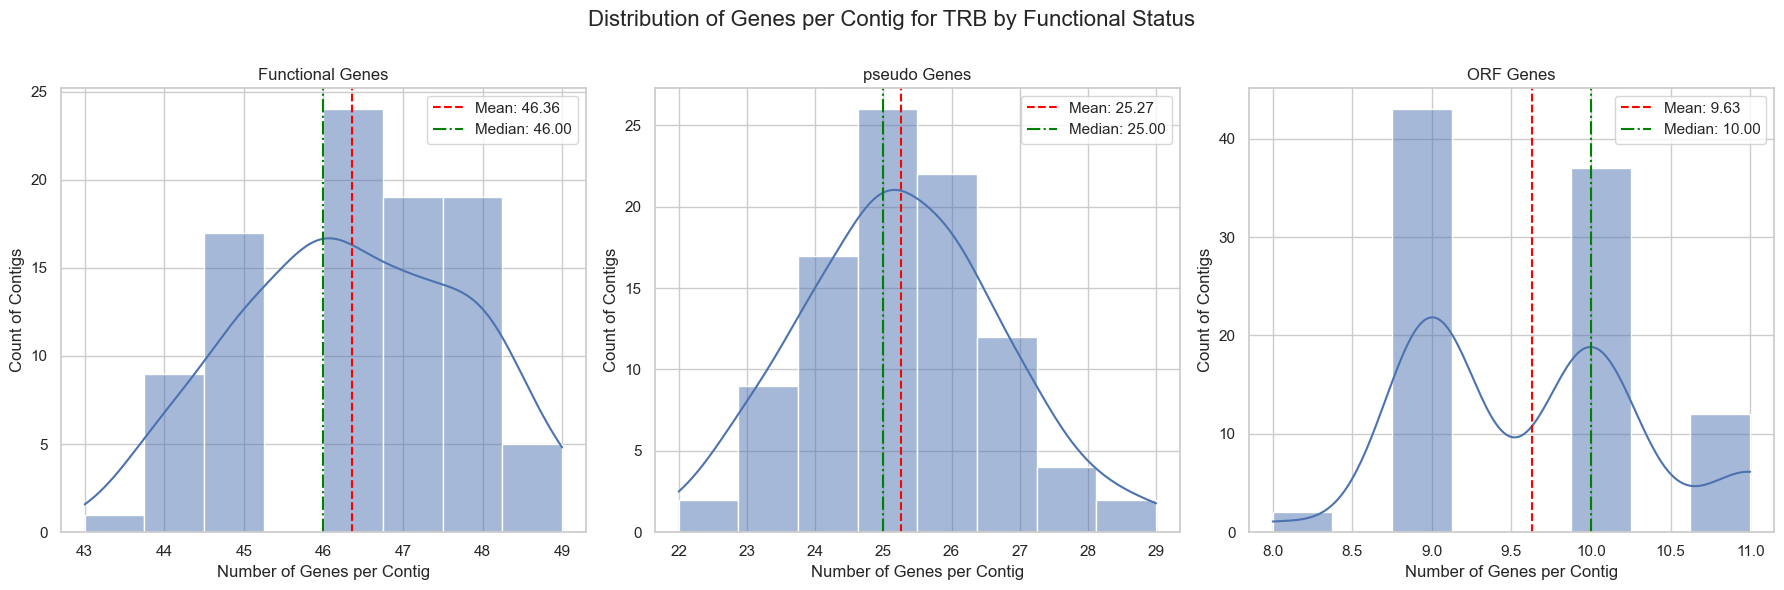

### Distribution of Genes per Contig for TRD

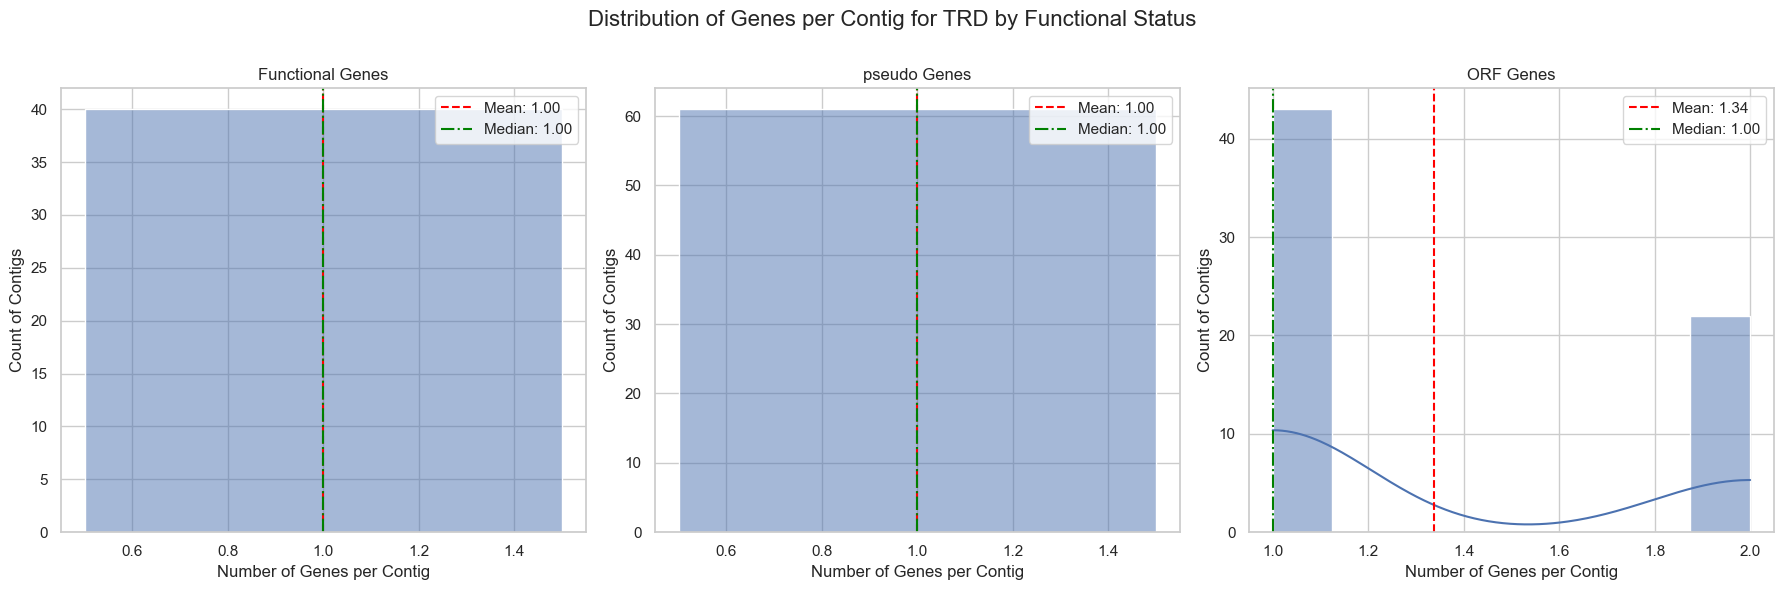

### Distribution of Genes per Contig for TRG

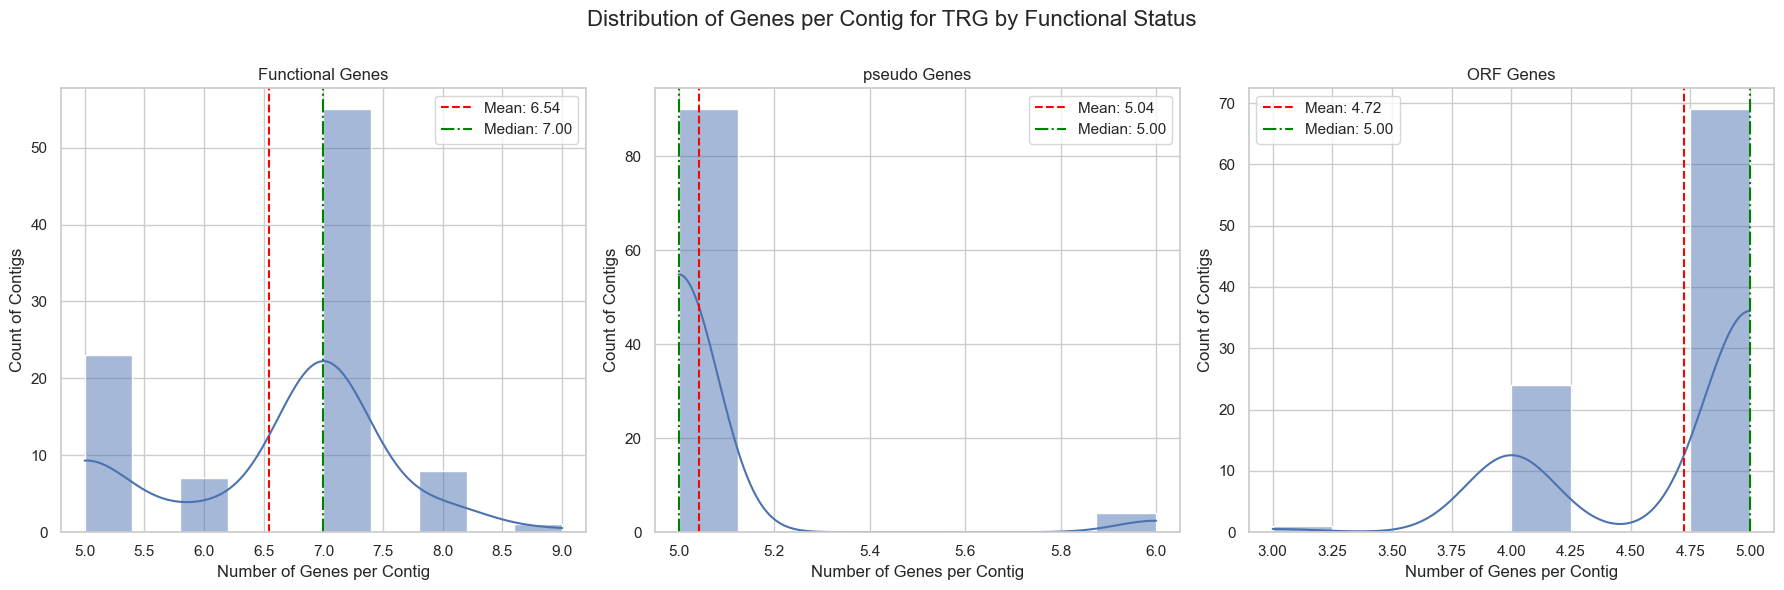

In [6]:

# Cell 7: Analysis of gene distribution per contig
display(md("## Distribution of Genes per Contig by Gene Type and Functional Status"))
display(md("This analysis examines how many genes of each functional status (functional, pseudogene, ORF) are found on each contig, grouped by gene type."))

# Check if functional column exists
if 'functional' in all_gene_data.columns:
    # Group data by gene_type, contig, and functional status and count the genes
    contig_gene_counts = all_gene_data.groupby(['gene_type', 'contig', 'functional']).size().reset_index(name='gene_count')
    
    # Get the unique gene types and functional statuses
    gene_types = all_gene_data['gene_type'].unique()
    functional_statuses = all_gene_data['functional'].unique()
    
    # Create plots for each gene type and functional status
    for gene_type in gene_types:
        display(md(f"### Distribution of Genes per Contig for {gene_type}"))
        
        # Filter data for this gene type
        gene_type_data = contig_gene_counts[contig_gene_counts['gene_type'] == gene_type]
        
        # Create a figure with 3 subplots (one for each functional status)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Distribution of Genes per Contig for {gene_type} by Functional Status', fontsize=16)
        
        # Define common functional statuses to look for
        expected_statuses = ['Functional', 'pseudo', 'ORF']  # Functional, Pseudogene, ORF
        
        # Create plots for each expected functional status
        for i, status in enumerate(expected_statuses):
            # Check if this status exists in the data
            status_data = gene_type_data[gene_type_data['functional'] == status]
            
            if len(status_data) > 0:
                # Create histogram/distribution plot
                sns.histplot(status_data['gene_count'], ax=axes[i], kde=True)
                axes[i].set_title(f'{status} Genes')
                axes[i].set_xlabel('Number of Genes per Contig')
                axes[i].set_ylabel('Count of Contigs')
                
                # Add mean and median as vertical lines
                mean_val = status_data['gene_count'].mean()
                median_val = status_data['gene_count'].median()
                axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
                axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
                axes[i].legend()
            else:
                axes[i].text(0.5, 0.5, f'No {status} genes found', 
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[i].transAxes, fontsize=14)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()
        
else:
    display(md("### Functional status column not found in the data"))


## Gaussian Mixture Model Analysis for IG Gene Types

This analysis uses Gaussian Mixture Models to identify the distribution of genes per contig.

### GMM Analysis for IGH

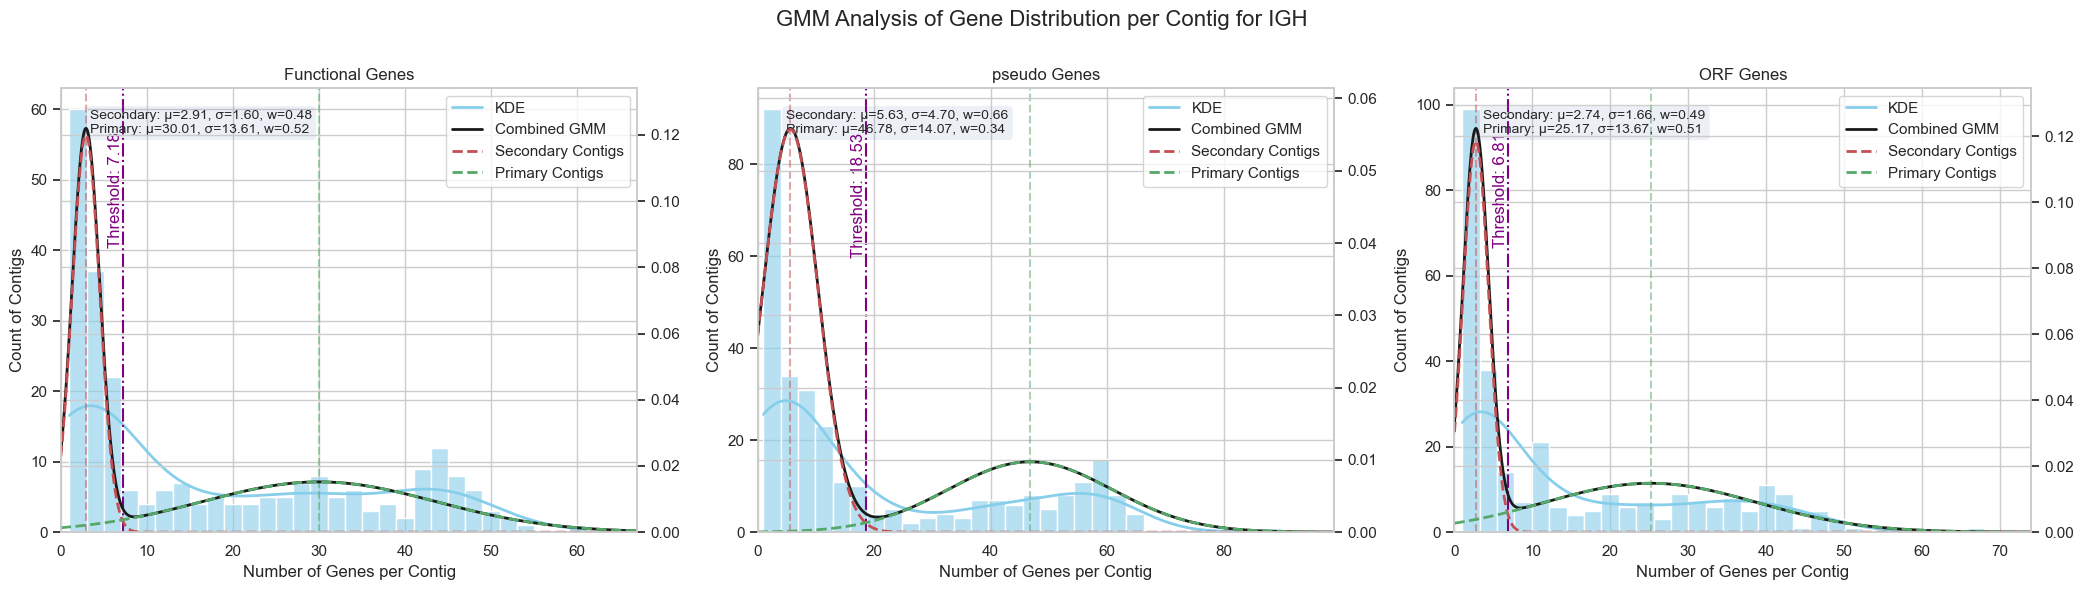

### GMM Analysis for IGK

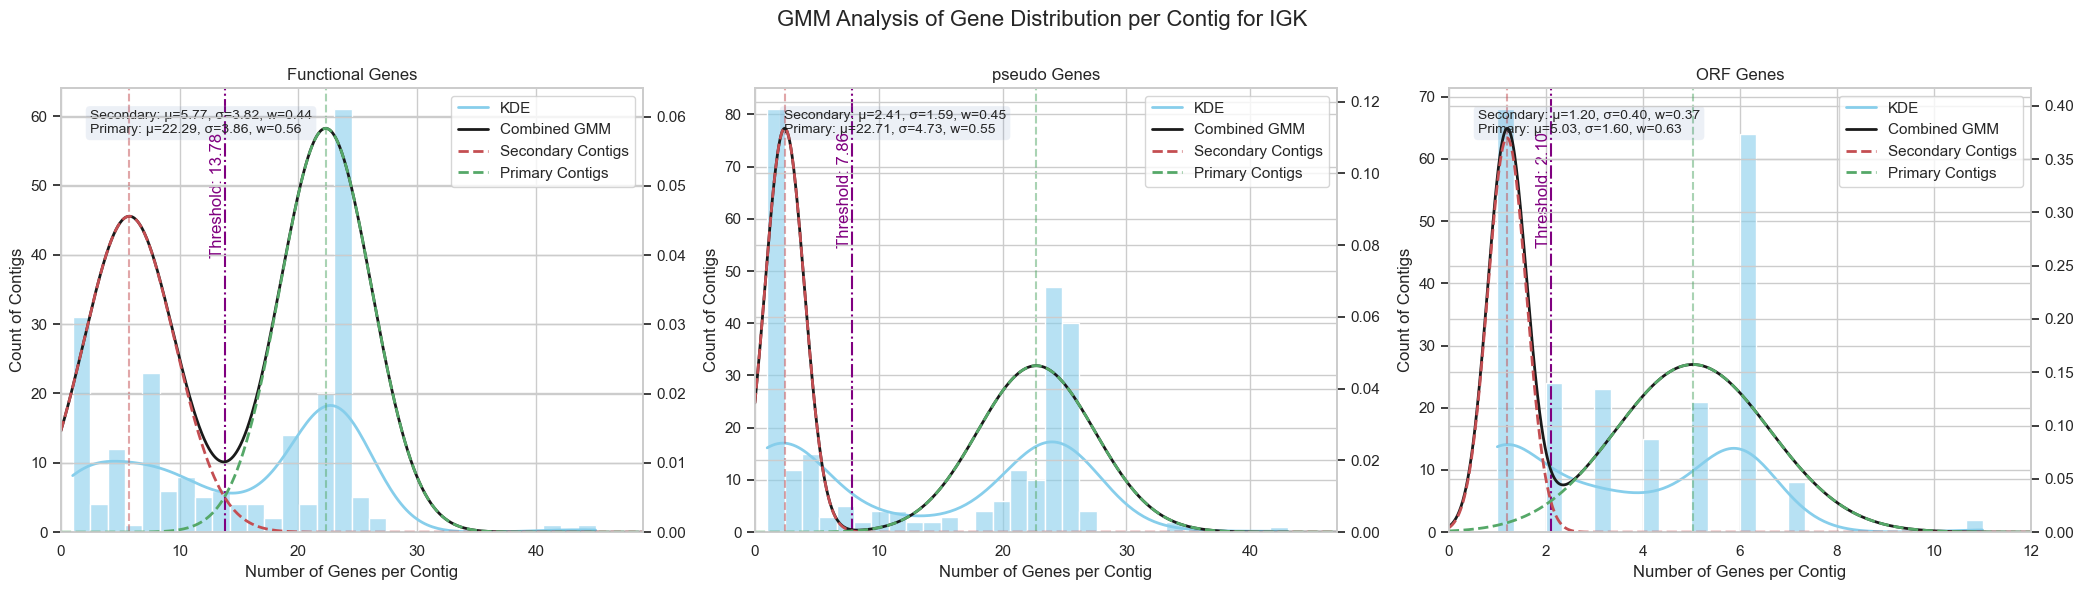

### GMM Analysis for IGL

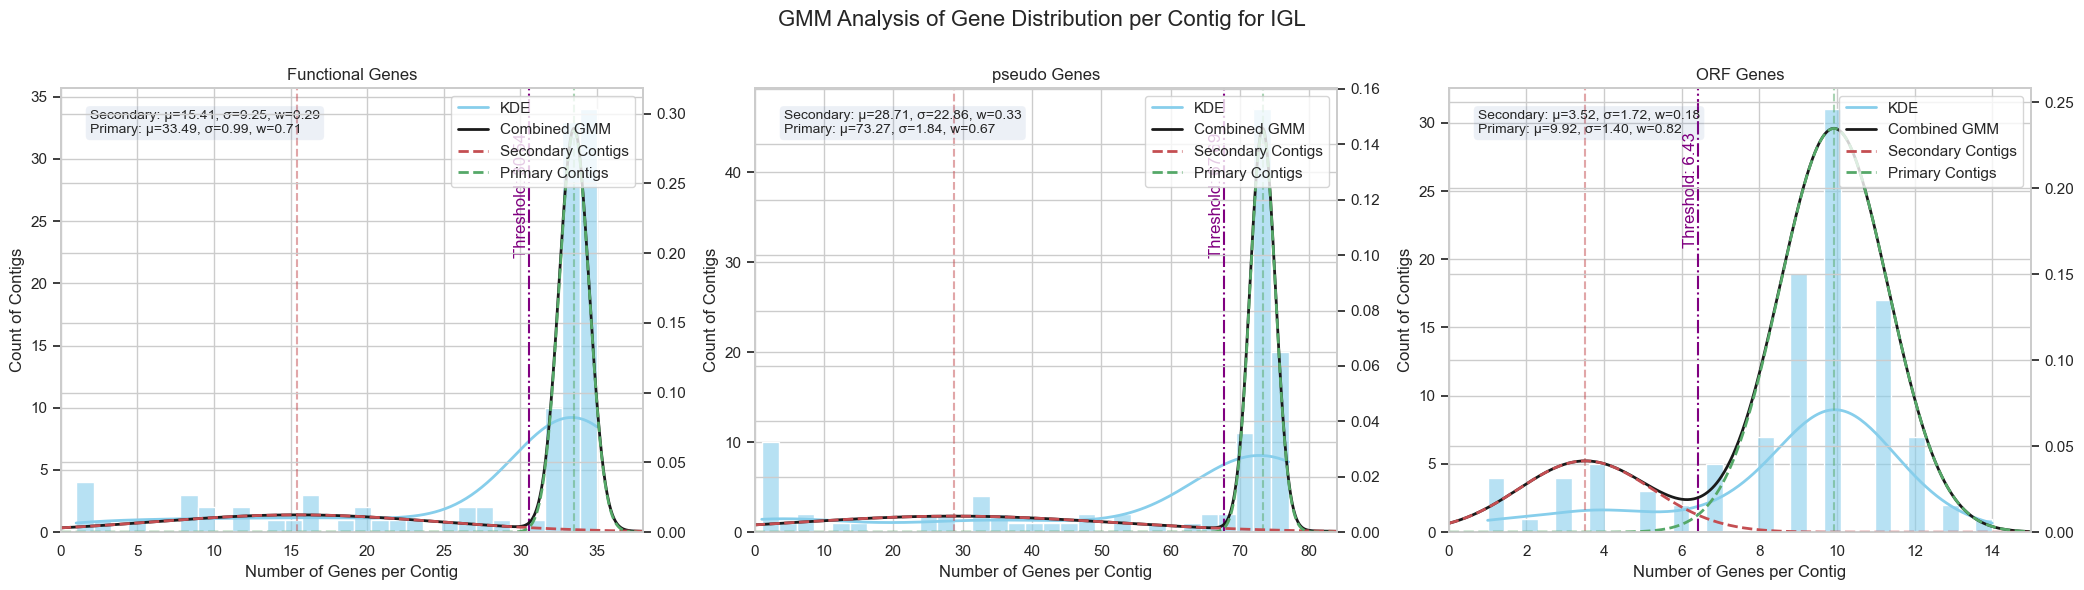

## Summary of GMM Analysis


The Gaussian Mixture Model (GMM) analysis reveals distinct patterns in the distribution of genes per contig across different IG types:

1. **For IGH**:
   - Functional genes show a bimodal distribution with clear separation between primary and secondary contigs
   - Pseudogenes show a similar pattern, though with different means for the two components
   - ORF genes also show bimodality, though with more overlap

2. **For IGK**:
   - Distinct distribution patterns are visible, often with clear separation between primary and secondary contigs
   - The distributions sometimes have more overlap than in IGH

3. **For IGL**:
   - Gene distributions often show more extreme separation
   - Primary contigs typically have higher gene counts compared to IGH and IGK

The purple threshold lines can be used in subsequent analyses to classify contigs as primary or secondary. These thresholds represent the optimal separation point between the two distributions as determined by the GMM.


In [7]:
# Cell: Gaussian Mixture Model Analysis for IG Gene Types
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from IPython.display import display, Markdown as md

display(md("## Gaussian Mixture Model Analysis for IG Gene Types"))
display(md("This analysis uses Gaussian Mixture Models to identify the distribution of genes per contig."))

# Function to analyze gene distribution using GMM
def analyze_gmm_for_gene_type(gene_data, gene_type):
    """
    Analyze gene distribution per contig using Gaussian Mixture Models.
    
    Parameters:
    - gene_data: DataFrame with gene data
    - gene_type: String for gene type to analyze (e.g., 'IGH')
    """
    # Filter data for the specified gene type
    gene_type_data = gene_data[gene_data['gene_type'] == gene_type]
    
    # Define the functional statuses in the desired order
    functional_statuses = ['Functional', 'pseudo', 'ORF']
    
    # Count genes per contig by functional status
    contig_gene_counts = gene_type_data.groupby(['contig', 'functional']).size().reset_index(name='gene_count')
    
    # Create a plot with subplots (one for each functional status)
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    fig.suptitle(f'GMM Analysis of Gene Distribution per Contig for {gene_type}', fontsize=16)
    
    # Determine x-axis limits dynamically for each functional status
    x_limits = {}
    for status in functional_statuses:
        status_data = contig_gene_counts[contig_gene_counts['functional'] == status]
        if len(status_data) > 0:
            # Set limit to 110% of the maximum value, with a minimum of 10
            max_val = status_data['gene_count'].max()
            x_limits[status] = (0, max(10, int(max_val * 1.1)))
        else:
            x_limits[status] = (0, 10)  # Default range if no data
    
    # Process each functional status
    for i, status in enumerate(functional_statuses):
        # Filter data for this functional status
        status_data = contig_gene_counts[contig_gene_counts['functional'] == status]
        
        if len(status_data) > 5:  # Only proceed if we have enough data
            # Get the gene counts
            gene_counts = status_data['gene_count'].values.reshape(-1, 1)
            
            # Fit a 2-component GMM
            gmm = GaussianMixture(n_components=2, random_state=0)
            gmm.fit(gene_counts)
            
            # Sort the components by mean (to ensure component 0 is "secondary" and 1 is "primary")
            sorted_indices = np.argsort(gmm.means_.flatten())
            means = gmm.means_.flatten()[sorted_indices]
            stds = np.sqrt(gmm.covariances_.flatten())[sorted_indices]
            weights = gmm.weights_.flatten()[sorted_indices]
            
            # Create a grid of x values for plotting the GMM distributions
            x = np.linspace(0, x_limits[status][1], 1000)
            
            # Calculate the weighted Gaussian distributions
            pdf1 = weights[0] * norm.pdf(x, means[0], stds[0])
            pdf2 = weights[1] * norm.pdf(x, means[1], stds[1])
            
            # Calculate the combined PDF (weighted sum of the two Gaussians)
            combined_pdf = pdf1 + pdf2
            
            # Plot histogram with KDE
            sns.histplot(status_data['gene_count'], bins=30, ax=axes[i], 
                         alpha=0.6, color='skyblue', kde=True,
                         line_kws={'color': 'blue', 'linewidth': 2, 'label': 'KDE'})
            
            # Plot the GMM distributions
            twin_ax = axes[i].twinx()
            twin_ax.plot(x, combined_pdf, 'k-', linewidth=2, label='Combined GMM')
            twin_ax.plot(x, pdf1, 'r--', linewidth=2, label='Secondary Contigs')
            twin_ax.plot(x, pdf2, 'g--', linewidth=2, label='Primary Contigs')
            twin_ax.set_ylim(0, max(combined_pdf) * 1.1)  # Set y-axis limit
            
            # Add legend for both axes
            lines1, labels1 = axes[i].get_legend_handles_labels()
            lines2, labels2 = twin_ax.get_legend_handles_labels()
            twin_ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
            
            # Add GMM component information to the plot
            axes[i].set_title(f'{status} Genes')
            axes[i].set_xlabel('Number of Genes per Contig')
            axes[i].set_ylabel('Count of Contigs')
            
            # Add text with the GMM parameters
            info_text = (f"Secondary: μ={means[0]:.2f}, σ={stds[0]:.2f}, w={weights[0]:.2f}\n"
                        f"Primary: μ={means[1]:.2f}, σ={stds[1]:.2f}, w={weights[1]:.2f}")
            axes[i].text(0.05, 0.95, info_text, transform=axes[i].transAxes, 
                         fontsize=10, va='top', bbox=dict(boxstyle='round', alpha=0.1))
            
            # Set the x-axis limits
            axes[i].set_xlim(x_limits[status])
            
            # Add vertical lines for the component means
            axes[i].axvline(means[0], color='r', linestyle='--', alpha=0.5)
            axes[i].axvline(means[1], color='g', linestyle='--', alpha=0.5)
            
            # Calculate the intersection point (threshold) between the two distributions
            if means[0] < means[1]:  # Ensure the components are properly ordered
                # Find the intersection point between the two PDFs
                intersection_indices = []
                for j in range(1, len(x)):
                    if (pdf1[j-1] > pdf2[j-1] and pdf1[j] <= pdf2[j]) or \
                       (pdf1[j-1] < pdf2[j-1] and pdf1[j] >= pdf2[j]):
                        intersection_indices.append(j)
                
                if intersection_indices:
                    # Use the intersection point closest to the midpoint between means
                    midpoint = (means[0] + means[1]) / 2
                    closest_idx = min(intersection_indices, 
                                     key=lambda idx: abs(x[idx] - midpoint))
                    intersection_x = x[closest_idx]
                    
                    axes[i].axvline(intersection_x, color='purple', linestyle='-.',
                                   label=f'Threshold: {intersection_x:.2f}')
                    axes[i].text(intersection_x, axes[i].get_ylim()[1]*0.9, 
                                f'Threshold: {intersection_x:.2f}', 
                                rotation=90, color='purple', va='top', ha='right')
                else:
                    # Fallback: use midpoint between means as threshold
                    midpoint = (means[0] + means[1]) / 2
                    axes[i].axvline(midpoint, color='purple', linestyle='-.',
                                   label=f'Threshold: {midpoint:.2f}')
                    axes[i].text(midpoint, axes[i].get_ylim()[1]*0.9, 
                                f'Threshold: {midpoint:.2f}', 
                                rotation=90, color='purple', va='top', ha='right')
        else:
            axes[i].text(0.5, 0.5, f'Not enough {status} data for GMM analysis', 
                         horizontalalignment='center', verticalalignment='center',
                         transform=axes[i].transAxes, fontsize=14)
            axes[i].set_title(f'{status} Genes')
            axes[i].set_xlabel('Number of Genes per Contig')
            axes[i].set_ylabel('Count of Contigs')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Run the GMM analysis for each IG gene type
display(md("### GMM Analysis for IGH"))
analyze_gmm_for_gene_type(all_gene_data, 'IGH')

display(md("### GMM Analysis for IGK"))
analyze_gmm_for_gene_type(all_gene_data, 'IGK')

display(md("### GMM Analysis for IGL"))
analyze_gmm_for_gene_type(all_gene_data, 'IGL')

display(md("## Summary of GMM Analysis"))
display(md("""
The Gaussian Mixture Model (GMM) analysis reveals distinct patterns in the distribution of genes per contig across different IG types:

1. **For IGH**:
   - Functional genes show a bimodal distribution with clear separation between primary and secondary contigs
   - Pseudogenes show a similar pattern, though with different means for the two components
   - ORF genes also show bimodality, though with more overlap

2. **For IGK**:
   - Distinct distribution patterns are visible, often with clear separation between primary and secondary contigs
   - The distributions sometimes have more overlap than in IGH

3. **For IGL**:
   - Gene distributions often show more extreme separation
   - Primary contigs typically have higher gene counts compared to IGH and IGK

The purple threshold lines can be used in subsequent analyses to classify contigs as primary or secondary. These thresholds represent the optimal separation point between the two distributions as determined by the GMM.
"""))

## Contig Classification Based on GMM Analysis

This analysis classifies contigs as primary or secondary based on the GMM thresholds, then visualizes the distribution of primary/secondary contigs across samples.

## Analysis for IGH

### GMM Thresholds for IGH

Functional     pseudo       ORF
0    7.176176  18.531532  6.814815

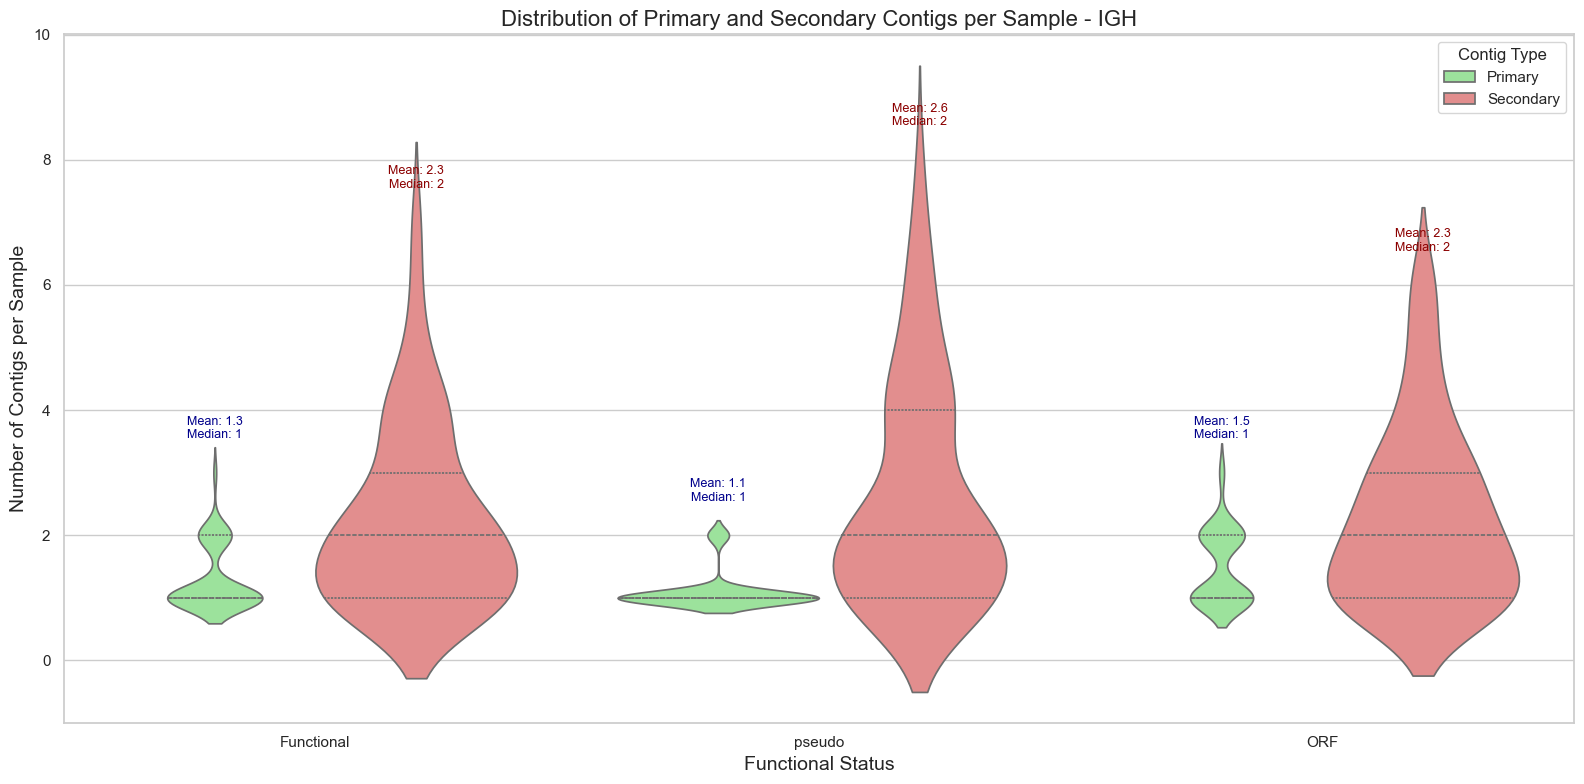

### Samples with Multiple Primary Contigs for IGH

Functional Status  Samples with Multiple Primary  Avg Primaries per Sample  \
0        Functional                             26                  2.076923   
2            pseudo                              9                  2.000000   
1               ORF                             42                  2.095238   

   Max Primaries in a Sample  Total Samples  \
0                          3             94   
2                          2             94   
1                          3             94   

   % of Samples with Multiple Primary  
0                                27.7  
2                                 9.6  
1                                44.7

## Analysis for IGK

### GMM Thresholds for IGK

Functional    pseudo       ORF
0   13.782783  7.856857  2.102102

<Figure size 1200x600 with 0 Axes>

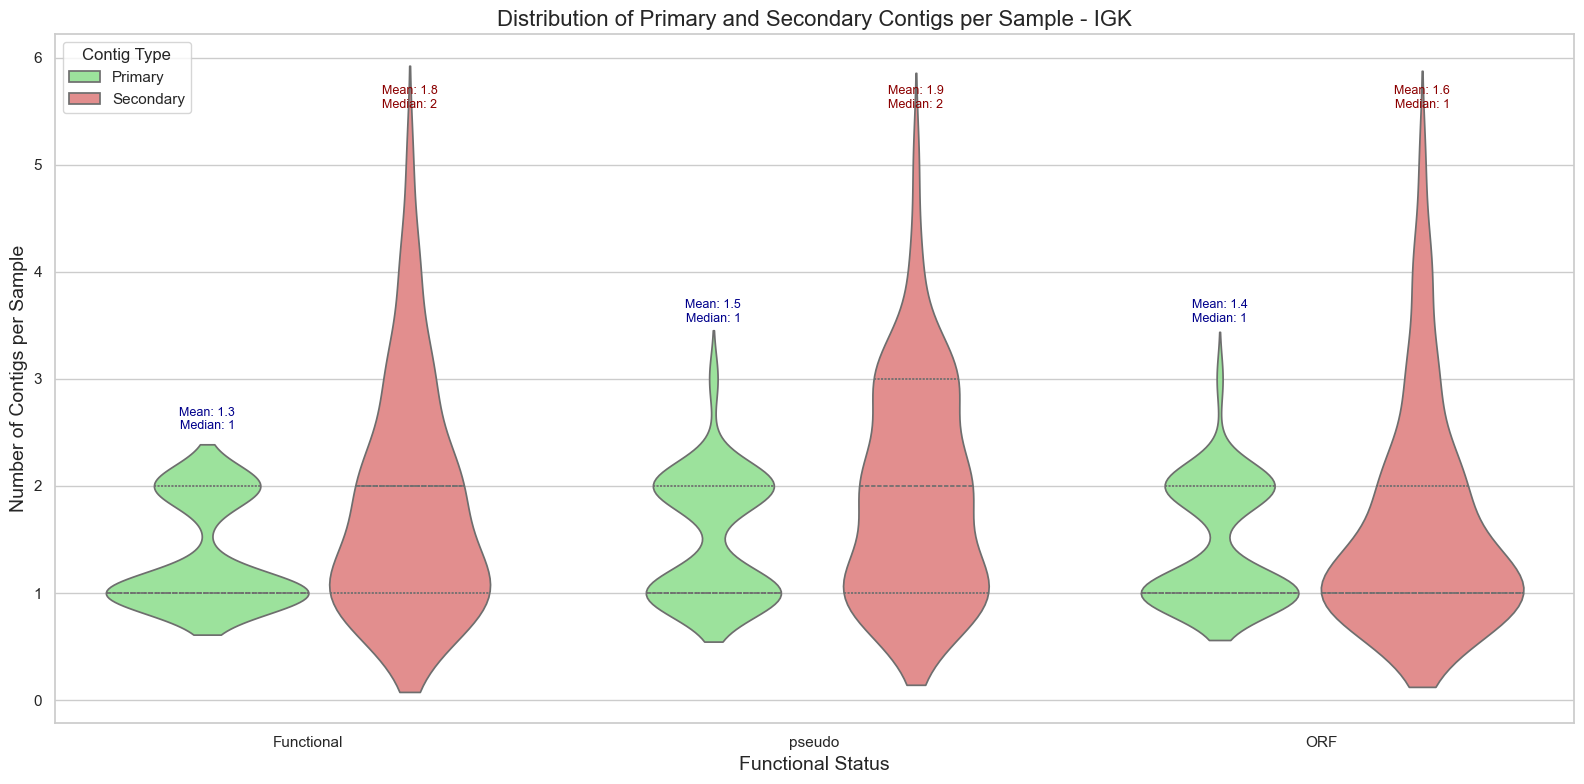

### Samples with Multiple Primary Contigs for IGK

Functional Status  Samples with Multiple Primary  Avg Primaries per Sample  \
0        Functional                             31                  2.000000   
2            pseudo                             46                  2.065217   
1               ORF                             39                  2.051282   

   Max Primaries in a Sample  Total Samples  \
0                          2             94   
2                          3             94   
1                          3             94   

   % of Samples with Multiple Primary  
0                                33.0  
2                                48.9  
1                                41.5

## Analysis for IGL

### GMM Thresholds for IGL

Functional     pseudo       ORF
0   30.544545  67.687688  6.426426

<Figure size 1200x600 with 0 Axes>

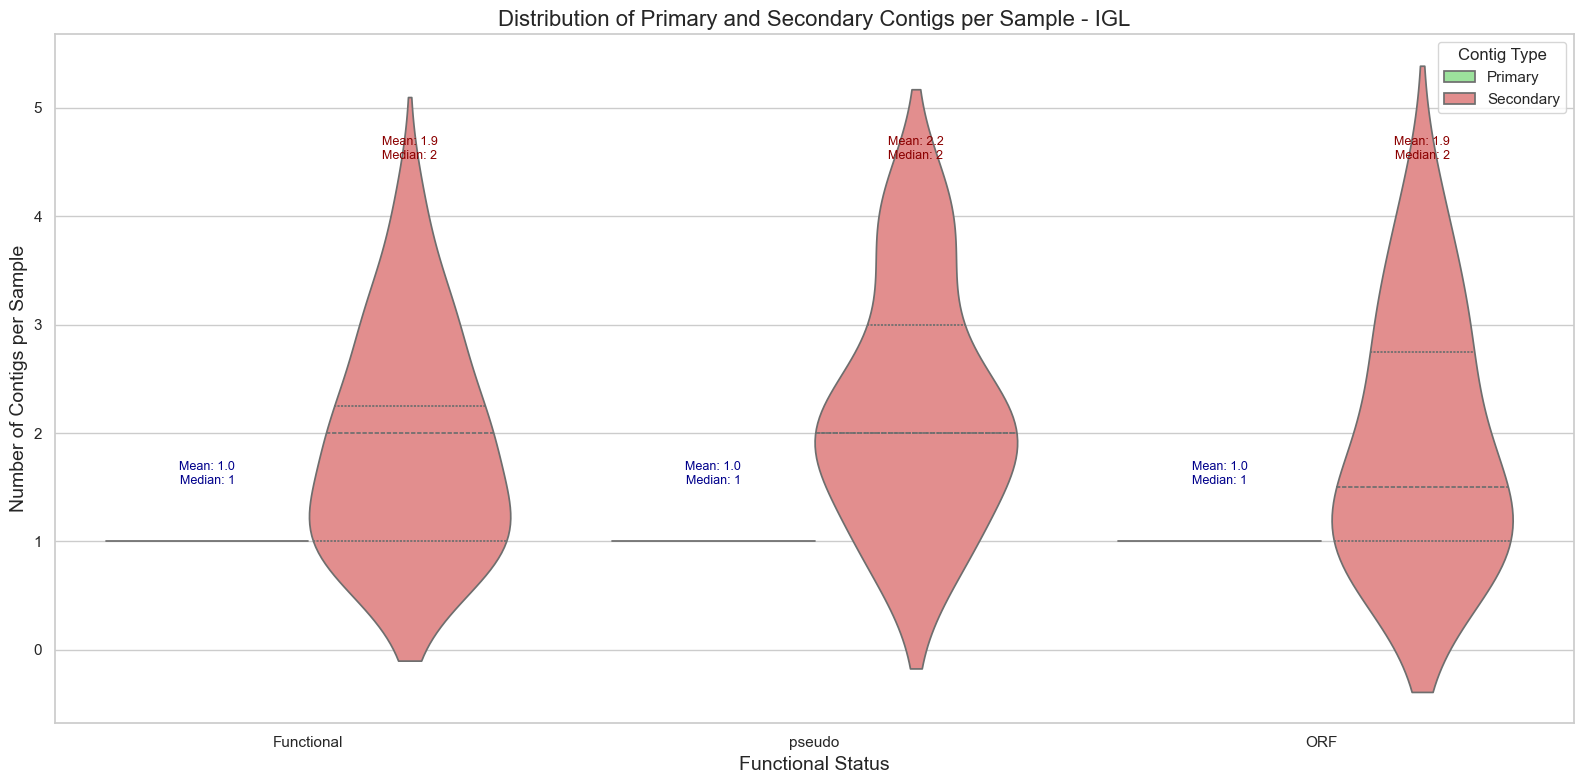

### Samples with Multiple Primary Contigs for IGL

No samples with multiple primary contigs found for IGL


## Summary of Contig Classification Analysis

This analysis has classified contigs as primary or secondary based on the GMM thresholds and visualized the distributions using violin plots:

1. **Primary vs Secondary Distributions**: The violin plots show the distribution of primary and secondary contigs across samples for each functional status.

2. **Functional Status Comparison**: We can directly compare the distributions between functional, pseudogene, and ORF genes within each gene type.

3. **Multiple Primary Contigs**: The analysis also identifies samples with multiple primary contigs, which may represent biologically interesting cases.

The classification allows us to focus subsequent analyses on the primary contigs, which likely represent the main functional regions, while still tracking secondary contigs for completeness.


In [8]:
# Cell: Classify Contigs and Analyze Distributions
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from IPython.display import display, Markdown as md

# Define the consistent order of functional statuses to use throughout the analysis
FUNCTIONAL_STATUS_ORDER = ['Functional', 'pseudo', 'ORF']

display(md("## Contig Classification Based on GMM Analysis"))
display(md("This analysis classifies contigs as primary or secondary based on the GMM thresholds, then visualizes the distribution of primary/secondary contigs across samples."))

# Define a function to get GMM thresholds for gene type and functional status
def get_gmm_thresholds(gene_data, gene_type, functional_statuses=FUNCTIONAL_STATUS_ORDER):
    """
    Calculate threshold values for classifying contigs based on GMM.
    
    Parameters:
    - gene_data: DataFrame with gene data
    - gene_type: String for gene type to analyze (e.g., 'IGH')
    - functional_statuses: List of functional status values
    
    Returns:
    - Dictionary of thresholds for each functional status
    """
    # Filter data for the specified gene type
    gene_type_data = gene_data[gene_data['gene_type'] == gene_type]
    
    # Count genes per contig by functional status
    contig_gene_counts = gene_type_data.groupby(['contig', 'functional']).size().reset_index(name='gene_count')
    
    # Calculate thresholds for each functional status
    thresholds = {}
    
    for status in functional_statuses:
        # Filter data for this functional status
        status_data = contig_gene_counts[contig_gene_counts['functional'] == status]
        
        if len(status_data) > 5:  # Only proceed if we have enough data
            # Get the gene counts
            gene_counts = status_data['gene_count'].values.reshape(-1, 1)
            
            # Fit a 2-component GMM
            gmm = GaussianMixture(n_components=2, random_state=0)
            gmm.fit(gene_counts)
            
            # Sort the components by mean
            sorted_indices = np.argsort(gmm.means_.flatten())
            means = gmm.means_.flatten()[sorted_indices]
            stds = np.sqrt(gmm.covariances_.flatten())[sorted_indices]
            weights = gmm.weights_.flatten()[sorted_indices]
            
            if len(means) > 1 and means[0] < means[1]:
                # Create a grid of x values
                x_max = int(gene_counts.max() * 1.1)
                x = np.linspace(0, x_max, 1000)
                
                # Calculate the weighted Gaussian distributions
                pdf1 = weights[0] * norm.pdf(x, means[0], stds[0])
                pdf2 = weights[1] * norm.pdf(x, means[1], stds[1])
                
                # Find the intersection point
                intersection_indices = []
                for j in range(1, len(x)):
                    if (pdf1[j-1] > pdf2[j-1] and pdf1[j] <= pdf2[j]) or \
                       (pdf1[j-1] < pdf2[j-1] and pdf1[j] >= pdf2[j]):
                        intersection_indices.append(j)
                
                if intersection_indices:
                    # Use the intersection point closest to the midpoint
                    midpoint = (means[0] + means[1]) / 2
                    closest_idx = min(intersection_indices, 
                                     key=lambda idx: abs(x[idx] - midpoint))
                    threshold = x[closest_idx]
                else:
                    # Fallback: use midpoint between means
                    threshold = midpoint
                
                thresholds[status] = threshold
            else:
                # If means are out of order or only one component, use mean of data
                thresholds[status] = float(np.mean(gene_counts))
        else:
            # Not enough data
            thresholds[status] = None
    
    return thresholds

# Function to classify contigs as primary or secondary
def classify_contigs(gene_data, gene_type, thresholds):
    """
    Classify contigs as primary or secondary based on the GMM thresholds.
    
    Parameters:
    - gene_data: DataFrame with gene data
    - gene_type: String for gene type (e.g., 'IGH')
    - thresholds: Dictionary of thresholds for each functional status
    
    Returns:
    - DataFrame with classified contigs
    """
    # Filter data for the specified gene type
    gene_type_data = gene_data[gene_data['gene_type'] == gene_type]
    
    # Count genes per contig by functional status and sample
    contig_counts = gene_type_data.groupby(['sample_name', 'contig', 'functional']).size().reset_index(name='gene_count')
    
    # Initialize classification column
    contig_counts['classification'] = 'Unknown'
    
    # Apply thresholds to classify contigs
    for status, threshold in thresholds.items():
        if threshold is not None:
            mask = (contig_counts['functional'] == status)
            contig_counts.loc[mask, 'classification'] = np.where(
                contig_counts.loc[mask, 'gene_count'] >= threshold, 
                'Primary', 
                'Secondary'
            )
    
    return contig_counts

# Function to visualize primary/secondary contig distributions with violin plots
def visualize_contig_distributions_violin(classified_contigs, gene_type):
    """
    Visualize the distribution of primary and secondary contigs across samples using violin plots.
    
    Parameters:
    - classified_contigs: DataFrame with classified contigs
    - gene_type: String for gene type (e.g., 'IGH')
    """
    # Count primary and secondary contigs per sample
    primary_counts = classified_contigs[classified_contigs['classification'] == 'Primary'].groupby(
        ['sample_name', 'functional']).size().reset_index(name='count')
    primary_counts['type'] = 'Primary'
    
    secondary_counts = classified_contigs[classified_contigs['classification'] == 'Secondary'].groupby(
        ['sample_name', 'functional']).size().reset_index(name='count')
    secondary_counts['type'] = 'Secondary'
    
    # Combine the data
    combined_counts = pd.concat([primary_counts, secondary_counts])
    
    # Create violin plot
    plt.figure(figsize=(16, 8))
    
    # Set the order of the functional statuses
    combined_counts['functional'] = pd.Categorical(
        combined_counts['functional'], 
        categories=FUNCTIONAL_STATUS_ORDER, 
        ordered=True
    )
    
    # Create the violin plot with three groups (functional statuses), each with two violins (primary/secondary)
    ax = sns.violinplot(x='functional', y='count', hue='type', data=combined_counts, 
                      split=False, inner='quartile', palette={'Primary': 'lightgreen', 'Secondary': 'lightcoral'})
    
    # Customize the plot
    plt.title(f'Distribution of Primary and Secondary Contigs per Sample - {gene_type}', fontsize=16)
    plt.xlabel('Functional Status', fontsize=14)
    plt.ylabel('Number of Contigs per Sample', fontsize=14)
    plt.legend(title='Contig Type')
    
    # Add count annotations
    for i, functional in enumerate(FUNCTIONAL_STATUS_ORDER):
        for j, contig_type in enumerate(['Primary', 'Secondary']):
            subset = combined_counts[(combined_counts['functional'] == functional) & 
                                    (combined_counts['type'] == contig_type)]
            if len(subset) > 0:
                # Position the annotations properly
                x_pos = i - 0.2 if j == 0 else i + 0.2
                
                # Calculate statistics
                mean_val = subset['count'].mean()
                median_val = subset['count'].median()
                max_val = subset['count'].max()
                
                # Add the annotations
                plt.text(x_pos, max_val + 0.5, f"Mean: {mean_val:.1f}\nMedian: {median_val:.0f}", 
                       ha='center', va='bottom', fontsize=9, color='darkblue' if j == 0 else 'darkred')
    
    plt.tight_layout()
    plt.show()

# Run the analysis for each IG gene type
gene_types = ['IGH', 'IGK', 'IGL']

for gene_type in gene_types:
    display(md(f"## Analysis for {gene_type}"))
    
    # Get GMM thresholds
    thresholds = get_gmm_thresholds(all_gene_data, gene_type)
    display(md(f"### GMM Thresholds for {gene_type}"))
    thresholds_df = pd.DataFrame([thresholds])
    display(thresholds_df)
    
    # Classify contigs
    classified_contigs = classify_contigs(all_gene_data, gene_type, thresholds)
    
    # Visualize distributions with violin plot
    visualize_contig_distributions_violin(classified_contigs, gene_type)
    
    # Show samples with multiple primary contigs
    display(md(f"### Samples with Multiple Primary Contigs for {gene_type}"))
    multi_primary = classified_contigs[classified_contigs['classification'] == 'Primary'].groupby(
        ['sample_name', 'functional']).size().reset_index(name='primary_count')
    multi_primary = multi_primary[multi_primary['primary_count'] > 1]
    
    if len(multi_primary) > 0:
        # Group by functional status
        multi_primary_stats = multi_primary.groupby('functional').agg(
            sample_count=('sample_name', 'nunique'),
            avg_primaries=('primary_count', 'mean'),
            max_primaries=('primary_count', 'max')
        ).reset_index()
        
        # Set the order of functional statuses
        multi_primary_stats['functional'] = pd.Categorical(
            multi_primary_stats['functional'], 
            categories=FUNCTIONAL_STATUS_ORDER, 
            ordered=True
        )
        
        # Sort by the ordered functional status
        multi_primary_stats = multi_primary_stats.sort_values('functional')
        
        # Calculate percentage of samples with multiple primaries
        total_samples_by_func = classified_contigs.groupby('functional')['sample_name'].nunique()
        multi_primary_stats['total_samples'] = multi_primary_stats['functional'].map(total_samples_by_func)
        multi_primary_stats['percentage'] = (multi_primary_stats['sample_count'] / multi_primary_stats['total_samples'] * 100).round(1)
        
        # Rename columns for clarity
        multi_primary_stats.columns = ['Functional Status', 'Samples with Multiple Primary', 
                                     'Avg Primaries per Sample', 'Max Primaries in a Sample',
                                     'Total Samples', '% of Samples with Multiple Primary']
        
        display(multi_primary_stats)
        
        # Plot the distribution of number of primary contigs for samples with multiple primaries
        plt.figure(figsize=(12, 6))
        
        # Create a categorical variable with the desired order
        multi_primary['functional'] = pd.Categorical(
            multi_primary['functional'], 
            categories=FUNCTIONAL_STATUS_ORDER, 
            ordered=True
        )
        
        # Sort by the ordered functional status
        multi_primary_sorted = multi_primary.sort_values('functional')
        
        # # Create the plot
        # sns.countplot(data=multi_primary_sorted, x='primary_count', hue='functional', hue_order=FUNCTIONAL_STATUS_ORDER)
        # plt.title(f'Distribution of Primary Contig Counts for Samples with Multiple Primaries - {gene_type}')
        # plt.xlabel('Number of Primary Contigs')
        # plt.ylabel('Count of Samples')
        # plt.legend(title='Functional Status')
        # plt.tight_layout()
        # plt.show()
    else:
        display(md(f"No samples with multiple primary contigs found for {gene_type}"))

display(md("""
## Summary of Contig Classification Analysis

This analysis has classified contigs as primary or secondary based on the GMM thresholds and visualized the distributions using violin plots:

1. **Primary vs Secondary Distributions**: The violin plots show the distribution of primary and secondary contigs across samples for each functional status.

2. **Functional Status Comparison**: We can directly compare the distributions between functional, pseudogene, and ORF genes within each gene type.

3. **Multiple Primary Contigs**: The analysis also identifies samples with multiple primary contigs, which may represent biologically interesting cases.

The classification allows us to focus subsequent analyses on the primary contigs, which likely represent the main functional regions, while still tracking secondary contigs for completeness.
"""))

### Contig classification based on top number of functional genes annotations

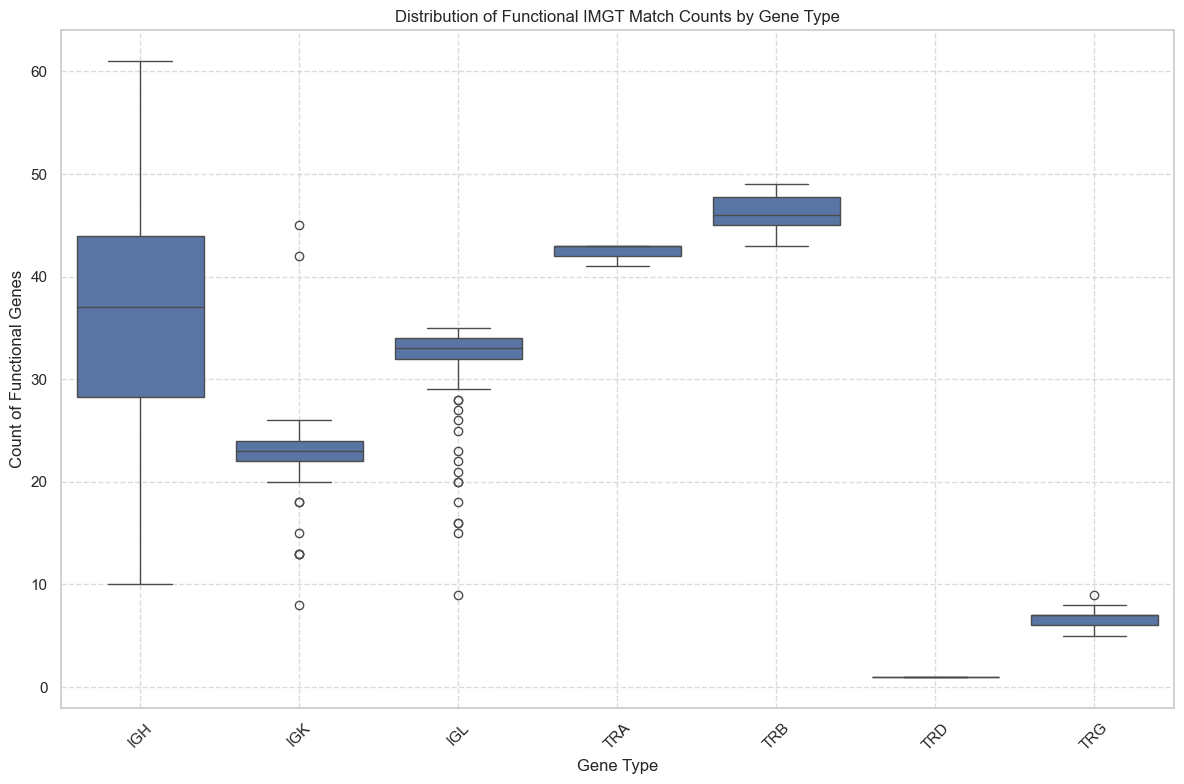

In [9]:
display(md("### Contig classification based on top number of functional genes annotations"))

# Group by sample_name, gene_type, and contig to count functional rows
functional_counts = all_gene_data[all_gene_data['functional'] == 'Functional'].groupby(
    ['sample_name', 'gene_type', 'contig']).size().reset_index(name='functional_count')

# For each sample_name and gene_type, find the contig with the highest functional count
top_contigs = functional_counts.sort_values('functional_count', ascending=False).groupby(
    ['sample_name', 'gene_type']).first().reset_index()

# Create result structure
result = {}
for _, row in top_contigs.iterrows():
    sample = row['sample_name']
    gene_type = row['gene_type']
    contig = row['contig']
    
    # Get imgt_match values for this sample, gene_type, and contig (ONLY FUNCTIONAL GENES)
    matches = all_gene_data[(all_gene_data['sample_name'] == sample) & 
                           (all_gene_data['gene_type'] == gene_type) & 
                           (all_gene_data['contig'] == contig) &
                           (all_gene_data['functional'] == 'Functional')]['imgt_match'].tolist()
    
    if sample not in result:
        result[sample] = {}
    
    result[sample][gene_type] = {
        'contig': contig,
        'imgt_matches': matches,
        'count': len(matches)
    }

# Prepare data for plotting
plot_data = []
for sample, gene_types in result.items():
    for gene_type, data in gene_types.items():
        plot_data.append({
            'sample_name': sample,
            'gene_type': gene_type,
            'count': data['count']
        })

plot_df = pd.DataFrame(plot_data)

# Plot distribution of counts by gene_type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='gene_type', y='count', data=plot_df)
plt.title('Distribution of Functional IMGT Match Counts by Gene Type')
plt.ylabel('Count of Functional Genes')
plt.xlabel('Gene Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [10]:
all_gene_types = set(all_gene_data['gene_type'].unique())
total_samples = len(result)

# Count how many samples are missing each gene type
missing_counts = {gene_type: 0 for gene_type in all_gene_types}
for sample_name, gene_types in result.items():
    sample_gene_types = set(gene_types.keys())
    missing = all_gene_types - sample_gene_types
    for gene_type in missing:
        missing_counts[gene_type] += 1

# Create and display a table of missing gene types
import pandas as pd
from IPython.display import display

# Filter to only gene types missing in at least one sample
missing_gene_types = {gt: count for gt, count in missing_counts.items() if count > 0}

if missing_gene_types:
    # Create a DataFrame for better display
    missing_df = pd.DataFrame({
        'Gene Type': list(missing_gene_types.keys()),
        'Missing Count': list(missing_gene_types.values()),
        'Total Samples': total_samples,
        'Missing Percentage': [f"{(count/total_samples*100):.1f}%" for count in missing_gene_types.values()]
    })
    
    # Sort by missing count (descending)
    missing_df = missing_df.sort_values('Missing Count', ascending=False)
    
    print("Gene Types Missing in at Least One Sample:")
    display(missing_df)
else:
    print("No gene types are missing in any samples.")

Gene Types Missing in at Least One Sample:


Gene Type  Missing Count  Total Samples Missing Percentage
0       TRD             54             94              57.4%

In [11]:
import os

# Create the output directory if it doesn't exist
output_dir = "digger-functional-annotations-top-contig"
os.makedirs(output_dir, exist_ok=True)

# Loop through each sample and write its functional alleles to a text file
for sample_name, gene_types in result.items():
    # Create file path
    file_path = os.path.join(output_dir, f"{sample_name}_functional_alleles.txt")
    
    with open(file_path, 'w') as f:
        f.write(f"# Functional alleles for sample: {sample_name}\n")
        f.write("# Format: gene_type\tcontig\timgt_match\n\n")
        
        # Write data for each gene type
        for gene_type, data in gene_types.items():
            contig = data['contig']
            matches = data['imgt_matches']
            
            f.write(f"## Gene Type: {gene_type} (Contig: {contig}, Count: {len(matches)})\n")
            
            # Write each match on a new line
            for match in sorted(matches):
                f.write(f"{gene_type}\t{contig}\t{match}\n")
            
            f.write("\n")  # Add a blank line between gene types
    
    print(f"Wrote {len(gene_types)} gene types to {file_path}")

print(f"All files written to {output_dir}/")

Wrote 7 gene types to digger-functional-annotations-top-contig/HG002.maternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 7 gene types to digger-functional-annotations-top-contig/HG002.paternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 6 gene types to digger-functional-annotations-top-contig/HG00438.maternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 7 gene types to digger-functional-annotations-top-contig/HG00438.paternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 6 gene types to digger-functional-annotations-top-contig/HG005.maternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 6 gene types to digger-functional-annotations-top-contig/HG005.paternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 7 gene types to digger-functional-annotations-top-contig/HG00621.maternal.f1_assembly_v2_genbank_functional_alleles.txt
Wrote 6 gene types to digger-functional-annotations-top-contig/HG00621.paternal.f1_assembly_v2_genbank_functional_alleles.txt


In [12]:
import os

# Create the base output directory
base_output_dir = "../digger-functional-annotations-all"

# Get all unique sample names
all_samples = all_gene_data['sample_name'].unique()

# Process each sample
for sample_name in all_samples:
    # Create sample-specific directory
    sample_dir = os.path.join(base_output_dir, sample_name)
    os.makedirs(sample_dir, exist_ok=True)
    
    # Get all gene types for this sample
    sample_data = all_gene_data[all_gene_data['sample_name'] == sample_name]
    sample_gene_types = sample_data['gene_type'].unique()
    
    # Process each gene type
    for gene_type in sample_gene_types:
        # Filter data for this gene type and only functional genes
        gene_data = sample_data[(sample_data['gene_type'] == gene_type) & 
                               (sample_data['functional'] == 'Functional')]
        
        # Skip if no functional genes of this type
        if len(gene_data) == 0:
            continue
            
        # Get all unique alleles for this gene type
        all_alleles = sorted(gene_data['imgt_match'].unique())
        
        # Get list of contigs these alleles come from
        contigs = sorted(gene_data['contig'].unique())
        
        # Create file path for this gene type
        file_path = os.path.join(sample_dir, f"{gene_type}_functional_alleles.txt")
        
        # Write alleles to file, one per line
        with open(file_path, 'w') as f:
            # Write header with information
            f.write(f"# Functional {gene_type} alleles for {sample_name}\n")
            f.write(f"# From {len(contigs)} contigs: {', '.join(contigs)}\n")
            f.write(f"# Total alleles: {len(all_alleles)}\n\n")
            
            # Write each allele on its own line
            for allele in all_alleles:
                f.write(f"{allele}\n")
        
        print(f"Wrote {len(all_alleles)} {gene_type} alleles to {file_path}")

print(f"All files written to {base_output_dir}/[sample_name]/[gene_type]_functional_alleles.txt")

Wrote 48 IGH alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/IGH_functional_alleles.txt
Wrote 26 IGK alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/IGK_functional_alleles.txt
Wrote 25 IGL alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/IGL_functional_alleles.txt
Wrote 43 TRA alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/TRA_functional_alleles.txt
Wrote 47 TRB alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/TRB_functional_alleles.txt
Wrote 1 TRD alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/TRD_functional_alleles.txt
Wrote 7 TRG alleles to ../digger-functional-annotations-all/HG002.maternal.f1_assembly_v2_genbank/TRG_functional_alleles.txt
Wrote 46 IGH alleles to ../digger-functional-annotations-all/HG002.paternal.f1_assembly_v2_genbank/IGH_functional_allele